# Overview of dataset

## Variables overview:

- **Bank Z-score (GFDD.SI.01 SI.01)**: It captures the probability of default of a country's commercial banking system. Z-score compares the buffer of a country's commercial banking system (capitalization and returns) with the volatility of those returns. (2000-2021)
  
- **Bank nonperforming loans to gross loans (%) (GFDD.SI.02 SI.02)**: Ratio of defaulting loans (payments of interest and principal past due by 90 days or more) to total gross loans (total value of loan portfolio). The loan amount recorded as nonperforming includes the gross value of the loan as recorded on the balance sheet, not just the amount that is overdue. (1998-2020)
  
- **Bank capital to total assets (%) (GFDD.SI.03 SI.03)**: Ratio of bank capital and reserves to total assets. Capital and reserves include funds contributed by owners, retained earnings, general and special reserves, provisions, and valuation adjustments. Capital includes tier 1 capital (paid-up shares and common stock), which is a common feature in all countries' banking systems, and total regulatory capital, which includes several specified types of subordinated debt instruments that need not be repaid if the funds are required to maintain minimum capital levels (these comprise tier 2 and tier 3 capital). Total assets include all nonfinancial and financial assets. (1998-2020)

- **Bank credit to bank deposits (%) (GFDD.SI.04 SI.04)**: The financial resources provided to the private sector by domestic money banks as a share of total deposits. Domestic money banks comprise commercial banks and other financial institutions that accept transferable deposits, such as demand deposits. Total deposits include demand, time and saving deposits in deposit money banks. (1960-2021)
  
- **Bank regulatory capital to risk-weighted assets (%) (GFDD.SI.05 SI.05)**: The capital adequacy of deposit takers. It is a ratio of total regulatory capital to its assets held, weighted according to risk of those assets. (1998-2020)

- **Liquid assets to deposits and short term funding (%) (GFDD.SI.06 SI.06)**: The ratio of the value of liquid assets (easily converted to cash) to short-term funding plus total deposits. Liquid assets include cash and due from banks, trading securities and at fair value through income, loans and advances to banks, reverse repos and cash collaterals. Deposits and short term funding includes total customer deposits (current, savings and term) and short term borrowing (money market instruments, CDs and other deposits). (2000-2021)

- **Provisions to nonperforming loans (%) (GFDD.SI.07 SI.07)**: Provisions to nonperforming loans. Nonperforming loans are loans for which the contractual payments are delinquent, usually defined as and NPL ratio being overdue for more than a certain number of days (e.g., usually more than 90 days). (1998-2020)

- **Stock price volatility (GFDD.SM.01 SM.01)**: Stock price volatility is the average of the 360-day volatility of the national stock market index. (1983-2021)

- **Bank concentration (%) (GFDD.OI.01 OI.01)**: Assets of three largest commercial banks as a share of total commercial banking assets. Total assets include total earning assets, cash and due from banks, foreclosed real estate, fixed assets, goodwill, other intangibles, current tax assets, deferred tax assets, discontinued operations and other assets. (2000-2021)

- **Bank deposits to GDP (%) (GFDD.OI.02 OI.02)**: The total value of demand, time and saving deposits at domestic deposit money banks as a share of GDP. Deposit money banks comprise commercial banks and other financial institutions that accept transferable deposits, such as demand deposits. (1960-2021)

In [ ]:
!pip uninstall torch

In [3]:
!pip install pandas==2.1.4 matplotlib seaborn scikit-learn imbalanced-learn xgboost category-encoders ppscore


  Using cached pandas-2.1.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
INFO: pip is looking at multiple versions of ppscore to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Using cached pandas-2.1.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Created wheel for ppscore: filename=ppscore-1.1.0-py2.py3-none-any.whl size=12962 sha256=35ba125648e2246255221b977234c14c52413a9901082a2a3288e1b33b41ea00
  Stored in directory: /root/.cache/pip/wheels/23/48/57/cbfd19190fb33e1911eaea34a2d845ebb21825477644c74cac
Successfully built ppscore
  Attempting uninstall: ppscore
    Found existing installation: ppscore 1.3.0
    U

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SKLEARN
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from imblearn.over_sampling import SMOTE, RandomOverSampler, KMeansSMOTE, ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
import numpy as np

from xgboost import XGBClassifier
import xgboost as xgb

import category_encoders as ce

import pickle

# pps analysis
import ppscore as pps

Now we get data from excel

In [6]:
features_df = pd.read_excel('Assignment_Part3_Data.xlsx', sheet_name='Features')
labels_df = pd.read_excel('Assignment_Part3_Data.xlsx', sheet_name='Labels')

# Now we check the labels and features

In [7]:
print("Features DataFrame:")
print(features_df.head())
print("\nLabels DataFrame:")
print(labels_df.head())

Features DataFrame:
  iso3 iso2  imfn country                     region       income  year  si01  \
0  ABW   AW   314   Aruba  Latin America & Caribbean  High income  1960   NaN   
1  ABW   AW   314   Aruba  Latin America & Caribbean  High income  1961   NaN   
2  ABW   AW   314   Aruba  Latin America & Caribbean  High income  1962   NaN   
3  ABW   AW   314   Aruba  Latin America & Caribbean  High income  1963   NaN   
4  ABW   AW   314   Aruba  Latin America & Caribbean  High income  1964   NaN   

   si02  si03  si04  si05  si06  si07  sm01  oi01  oi02  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

Labels DataFrame:
  iso3  Country  Year  Banking Crisis 
0  DZA  Algeria  1980              0.0
1  DZA  Algeria  1981              0.0
2  DZA  A

# Merge the two datasets

After checking the labels and features, we can see that they share a common column 'iso3', which enables us to merge the two datasets.

In [8]:
# Merge the two dataframes with 'iso3' and 'Year'
# Change the 'Year' column to 'year' in the labels_df
labels_df = labels_df.rename(columns={'Year': 'year'})
merged_df = pd.merge(features_df, labels_df, on=['iso3', 'year'])
# See the merged dataframe
print("\nMerged DataFrame:")
print(merged_df.head())
# See if there are any failed merges
print("shape of merged_df: ", merged_df.shape)
print("shape of features_df: ", features_df.shape)
print("shape of labels_df: ", labels_df.shape)

# Draw charts to see the merge process

initial_features_count = len(features_df)
initial_labels_count = len(labels_df)
merged_count = len(merged_df)

origin_features_df = features_df.copy()

# Delete in the features df the rows that are in the merged df, that is: iso3, year pair that are in features df but not in merged df
for index, row in merged_df.iterrows():
    features_df = features_df.drop(features_df[(features_df['iso3'] == row['iso3']) & (features_df['year'] == row['year'])].index)

print("shape of features_df after removing the merged rows: ", features_df.shape)


Merged DataFrame:
  iso3 iso2  imfn country              region               income  year  \
0  AGO   AO   614  Angola  Sub-Saharan Africa  Lower middle income  1980   
1  AGO   AO   614  Angola  Sub-Saharan Africa  Lower middle income  1981   
2  AGO   AO   614  Angola  Sub-Saharan Africa  Lower middle income  1982   
3  AGO   AO   614  Angola  Sub-Saharan Africa  Lower middle income  1983   
4  AGO   AO   614  Angola  Sub-Saharan Africa  Lower middle income  1984   

   si01  si02  si03  si04  si05  si06  si07  sm01  oi01  oi02 Country  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  Angola   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  Angola   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  Angola   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  Angola   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  Angola   

   Banking Crisis   
0              0.0  
1              0.0  
2              0.0  
3

# Missing data analysis
Now we see how much data is missing due to our merge.
### Missing data percentage by country
- We group the missing data by the 'country' column.
- We count the total value of the rows per country in the origin_features_df.
- As long as there are one column is filled among si01  si02  si03  si04  si05  si06  si07  sm01  oi01  oi02, we consider the row is filled.

                        iso3      iso2      imfn    region    income  \
country                                                                
Afghanistan         0.612903  0.612903  0.612903  0.612903  0.612903   
Albania             0.451613  0.451613  0.451613  0.451613  0.451613   
Algeria             0.338710  0.338710  0.338710  0.338710  0.338710   
Andorra             0.306452  0.306452  0.306452  0.306452  0.306452   
Angola              0.080645  0.080645  0.080645  0.080645  0.080645   
...                      ...       ...       ...       ...       ...   
Vietnam             0.467742  0.467742  0.467742  0.467742  0.467742   
West Bank and Gaza  0.419355  0.419355  0.419355  0.419355  0.419355   
Yemen, Rep.         0.483871  0.483871  0.483871  0.483871  0.483871   
Zambia              0.080645  0.080645  0.080645  0.080645  0.080645   
Zimbabwe            0.161290  0.161290  0.161290  0.161290  0.161290   

                        year      si01      si02      si03     

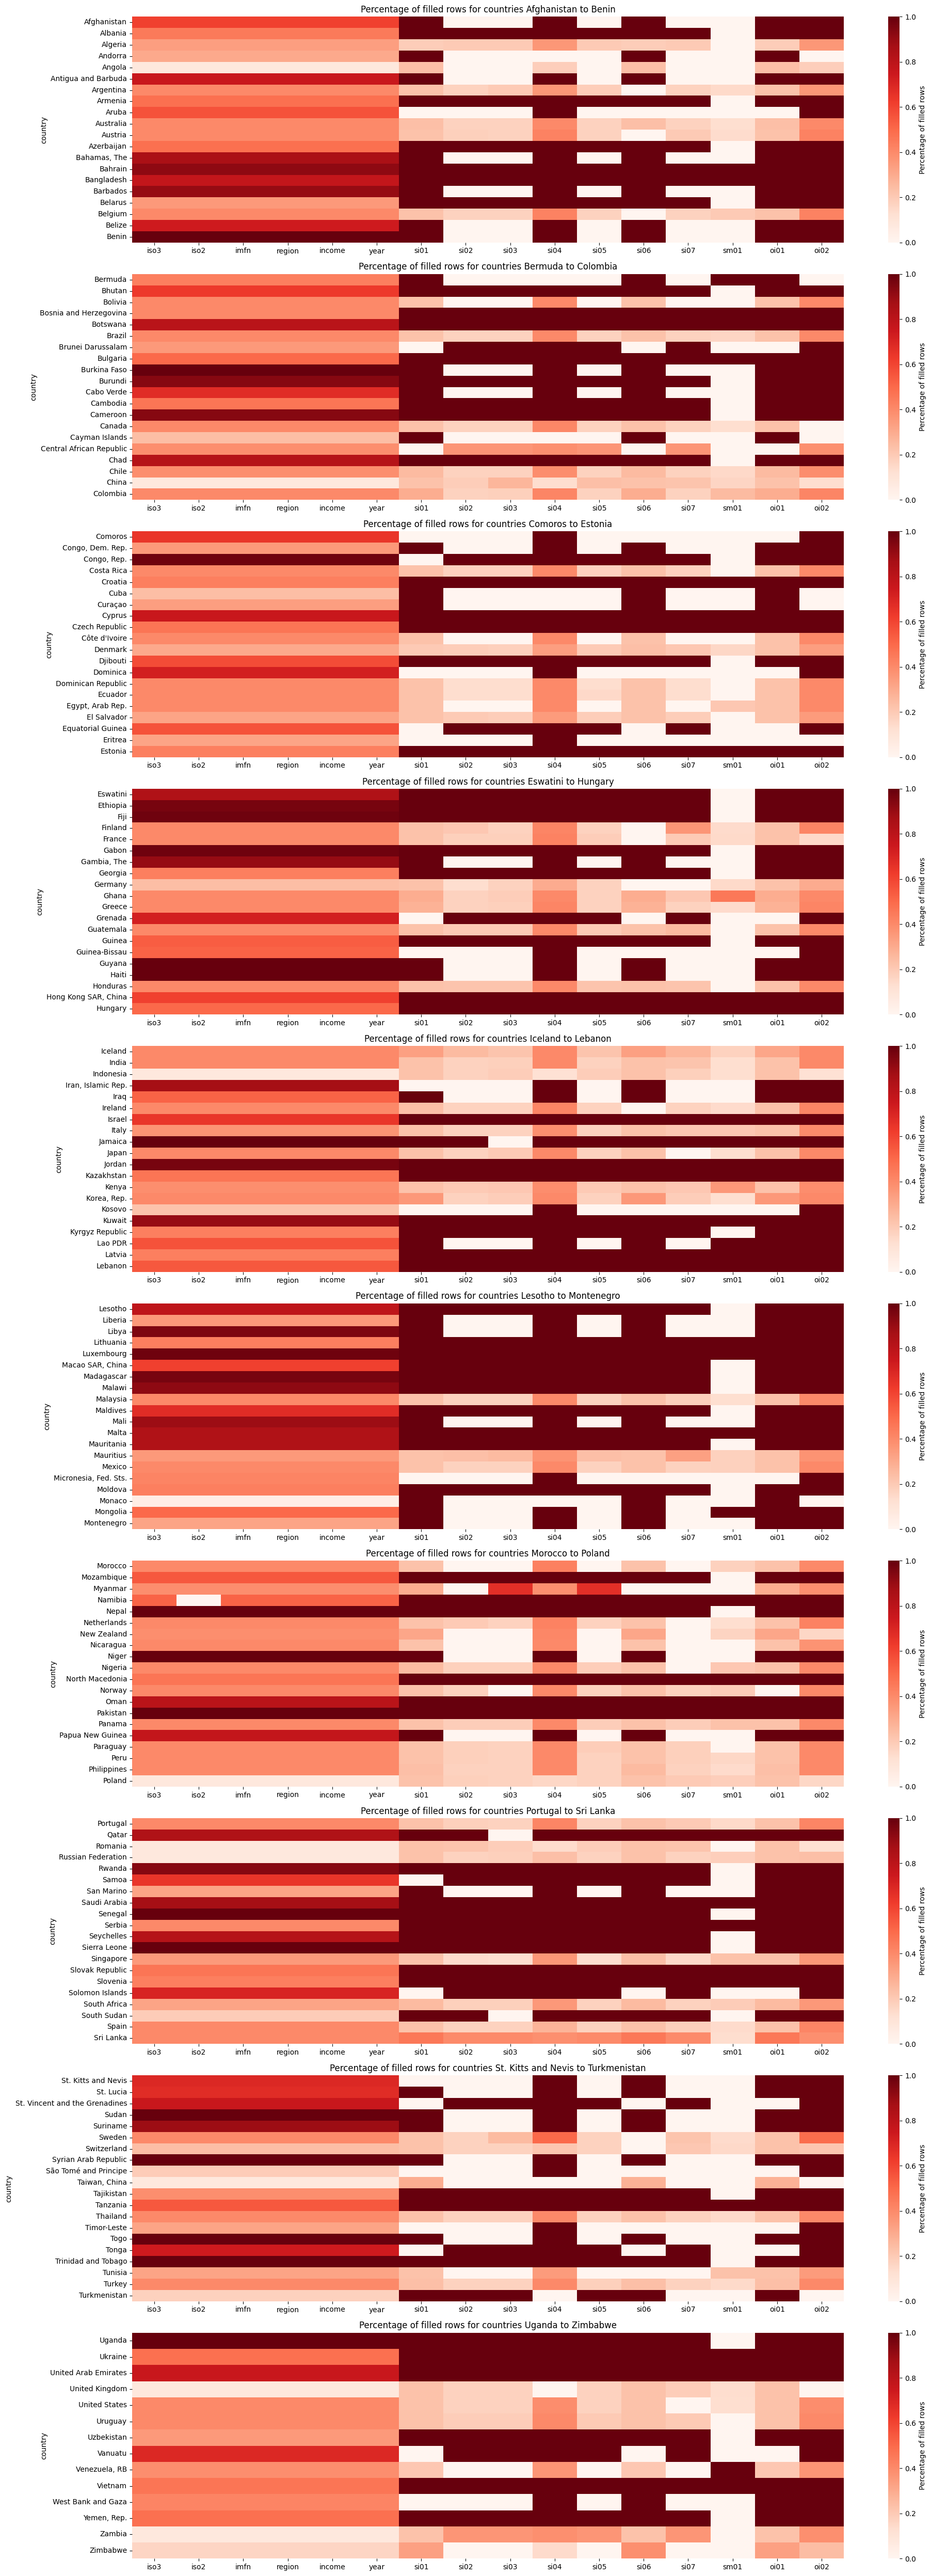

In [9]:
# Get the count of the rows group by each country that are not empty
# As long as there are one column is filled among si01  si02  si03  si04  si05  si06  si07  sm01  oi01  oi02, we consider the row is filled.
features_df_na_dropped = features_df.copy()
for index, row in features_df_na_dropped.iterrows():
    if row[['si01', 'si02', 'si03', 'si04', 'si05', 'si06', 'si07', 'sm01', 'oi01', 'oi02']].count() == 0:
        features_df_na_dropped = features_df_na_dropped.drop(index)
# get the count of the rows group by each country
features_df_na_dropped_count = features_df_na_dropped.groupby('country').count()

# Get the total number of rows for each country in the original features_df
features_df_total = origin_features_df.groupby('country').count()
features_df_percent = features_df_na_dropped_count.copy()
# For every row in the features_df_na_dropped, get the total number for each column in the original features_df, and divide the count in features_df_na_dropped by the total count
for index, row in features_df_na_dropped_count.iterrows():
    features_df_percent.loc[index] = features_df_na_dropped_count.loc[index] / features_df_total.loc[index]
# Set all NaN values to 0
features_df_percent = features_df_percent.fillna(0)

print(features_df_percent)

countries = features_df_percent.index.unique()

group_size = 20
country_groups = [countries[i:i + group_size] for i in range(0, len(countries), group_size)]


num_groups = len(country_groups)
fig, axes = plt.subplots(num_groups, 1, figsize=(20, 5 * num_groups))

if num_groups == 1:
    axes = [axes]

for ax, group in zip(axes, country_groups):
    sns.heatmap(features_df_percent.loc[group], annot=False, cmap="Reds", cbar_kws={'label': 'Percentage of filled rows'}, ax=ax)
    ax.set_title(f'Percentage of filled rows for countries {group[0]} to {group[-1]}')

plt.tight_layout()
plt.show()



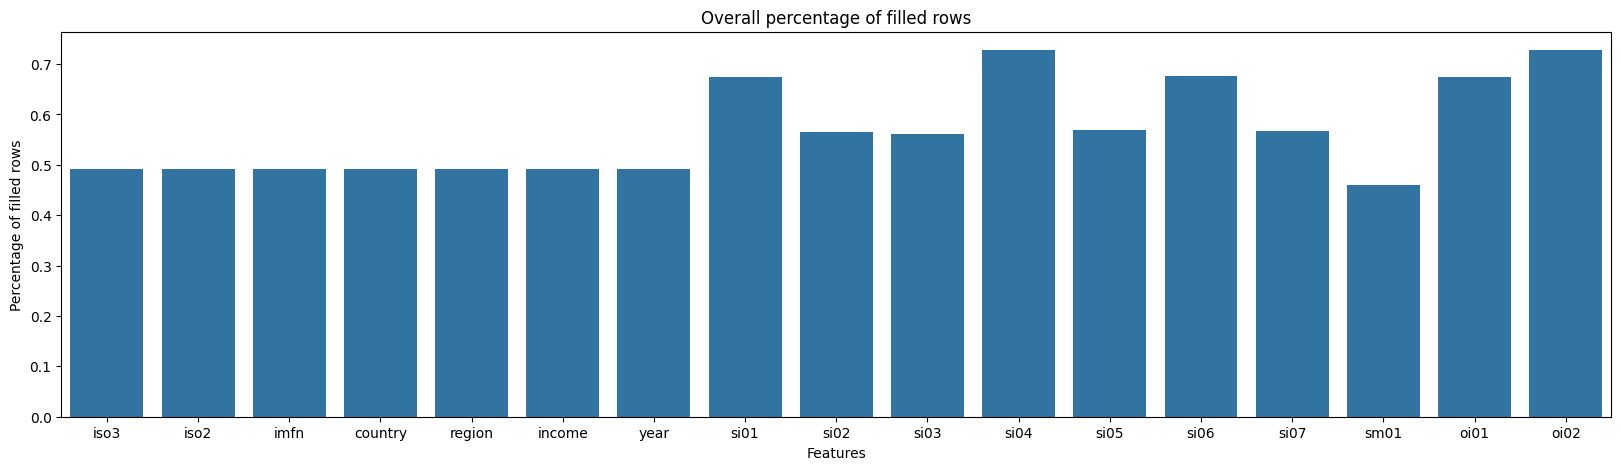

In [13]:


# Get the overall percentage of filled rows regardless of the country
count_dropped = features_df_na_dropped.count()
total = origin_features_df.count()
features_df_percent_overall = count_dropped / total

# Plot as a bar chart
plt.figure(figsize=(20, 5))
sns.barplot(x=features_df_percent_overall.index, y=features_df_percent_overall)
plt.title('Overall percentage of filled rows')
plt.ylabel('Percentage of filled rows')
plt.xlabel('Features')
plt.show()

# Summary of missing data analysis
- We can see that the missing data percentage is quite acceptable compared to a 80.8% missing percentage by merging the two datasets.

# Data exploration

- Since the data are separated into different regions and periods, we should plot out the data and see the overall distribution among the regions and periods for each feature.
- We will use `merged_df` for this purpose.

### Process
- First we will plot out the time period distribution for each feature and decide out the most appropriate time period for the analysis.
- Then we will plot out the region distribution for each feature and see if there are unbalanced data counts among the regions.
    - If the dataset is unbalanced, we would consider resample some of the regions.
- Next, for each target value (0, 1), we will plot out the distribution and see if we need further resampling
- Finally we will plot out the distribution of each feature and see if there are any outliers or skewness in the data.




      si01  si02  si03  si04  si05  si06  si07  sm01  oi01  oi02
year                                                            
1980     0     0     0    60     0     0     0     0     0    59
1981     0     0     0    61     0     0     0     0     0    60
1982     0     0     0    61     0     0     0     0     0    60
1983     0     0     0    61     0     0     0     0     0    60
1984     0     0     0    62     0     0     0     9     0    60
1985     0     0     0    63     0     0     0    11     0    61
1986     0     0     0    61     0     0     0    12     0    60
1987     0     0     0    62     0     0     0    18     0    61
1988     0     0     0    62     0     0     0    24     0    62
1989     0     0     0    61     0     0     0    26     0    61
1990     0     0     0    63     0     0     0    28     0    62
1991     0     0     0    61     0     0     0    30     0    61
1992     0     0     0    62     0     0     0    31     0    62
1993     0     0     0   

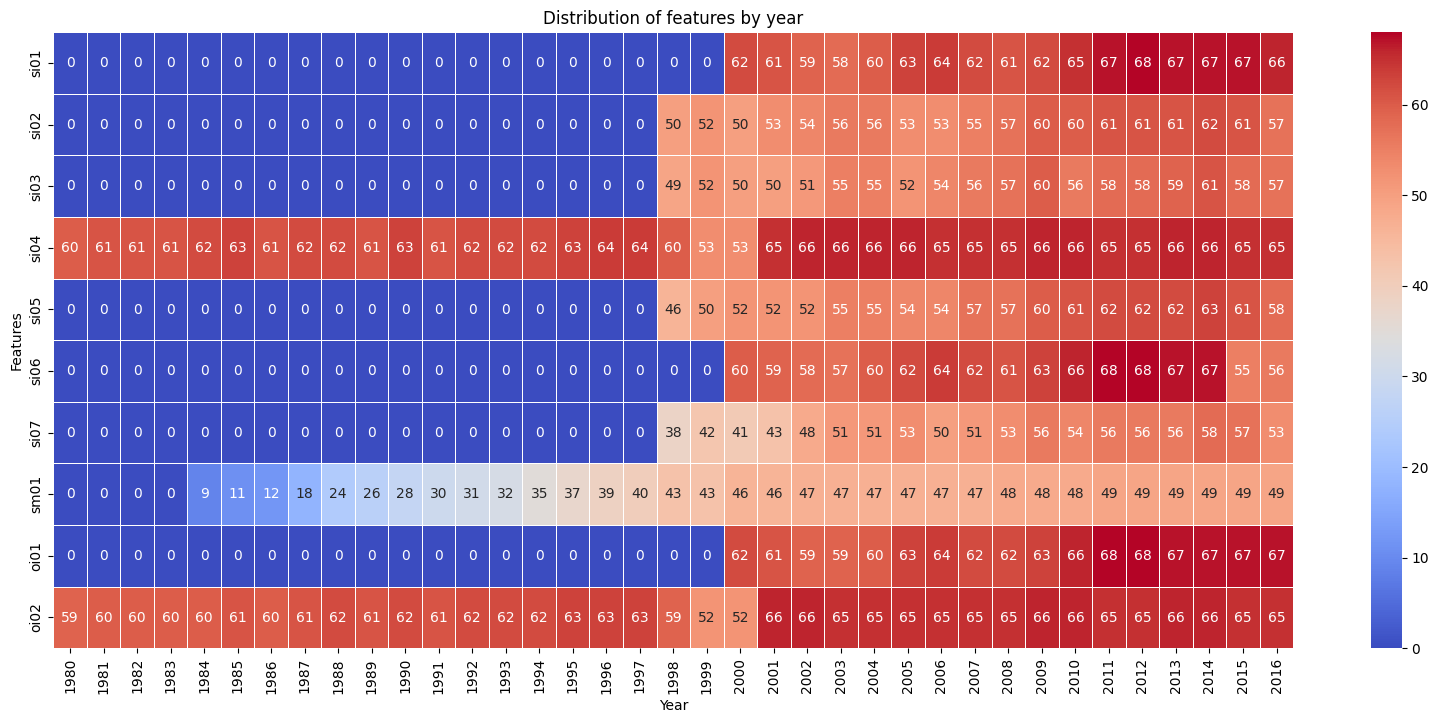

In [16]:
columns = ['year', 'si01', 'si02', 'si03', 'si04', 'si05', 'si06', 'si07', 'sm01', 'oi01', 'oi02']
yearly_distribution = merged_df[columns].groupby('year').apply(lambda x: x.notnull().sum())

yearly_distribution = yearly_distribution.drop(columns='year')
print(yearly_distribution)

plt.figure(figsize=(20, 8))
sns.heatmap(yearly_distribution.T, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)
plt.title('Distribution of features by year')
plt.ylabel('Features')
plt.xlabel('Year')
plt.show()


               si01  si02  si03  si04  si05  si06  si07  sm01  oi01  oi02
country                                                                  
Algeria          17     8     8    37     8    17     8     0    17    37
Angola           16     0     1    22     0    16     0     0    16    22
Argentina        17    19    16    37    17    15    19    29    17    37
Australia        16    19    19    37    19    16    19    33    16    37
Austria          17    18    19    34    19    15    16    31    17    34
...             ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
United States    17    19    19    37    19    17    12    33    17    37
Uruguay          17    17    17    37    16    17    16     0    17    37
Venezuela, RB    15    17    17    35    14    15    17     0    15    35
Zambia           17     7     7     8     7    17     7     0    17     8
Zimbabwe         10     0     0    30     0     8     0     0    10    31

[69 rows x 10 columns]


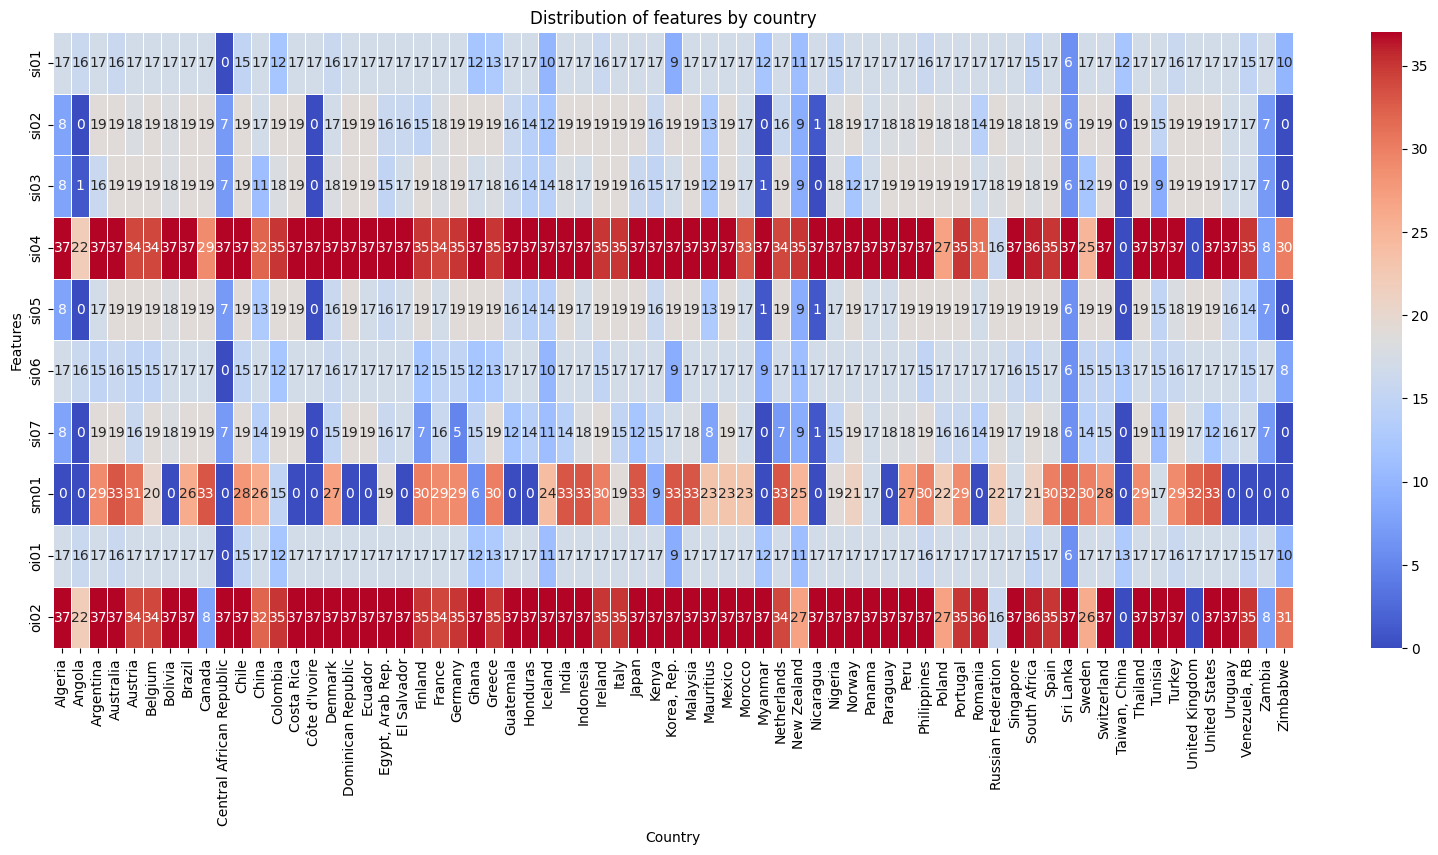

In [20]:
columns = ['country', 'si01', 'si02', 'si03', 'si04', 'si05', 'si06', 'si07', 'sm01', 'oi01', 'oi02']
country_distribution = merged_df[columns].groupby('country').apply(lambda x: x.notnull().sum())

# Drop the 'country' column
country_distribution = country_distribution.drop(columns='country')
print(country_distribution)

# Plot the distribution using a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(country_distribution.T, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)
plt.title('Distribution of features by country')
plt.ylabel('Features')
plt.xlabel('Country')
plt.show()

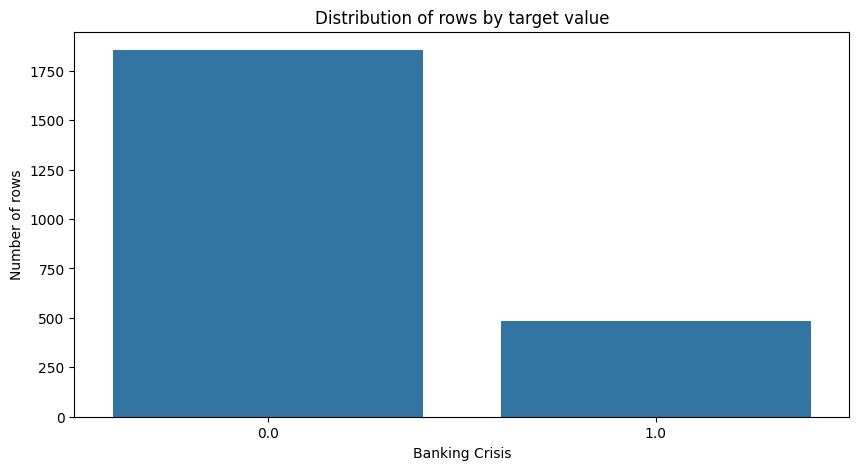

In [21]:
# Plot the distribution of rows on the merged_df group by target value: 'Banking Crisis '
# Get the count of rows for each target value
target_distribution = merged_df['Banking Crisis '].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=target_distribution.index, y=target_distribution)
plt.title('Distribution of rows by target value')
plt.ylabel('Number of rows')
plt.xlabel('Banking Crisis')
plt.show()

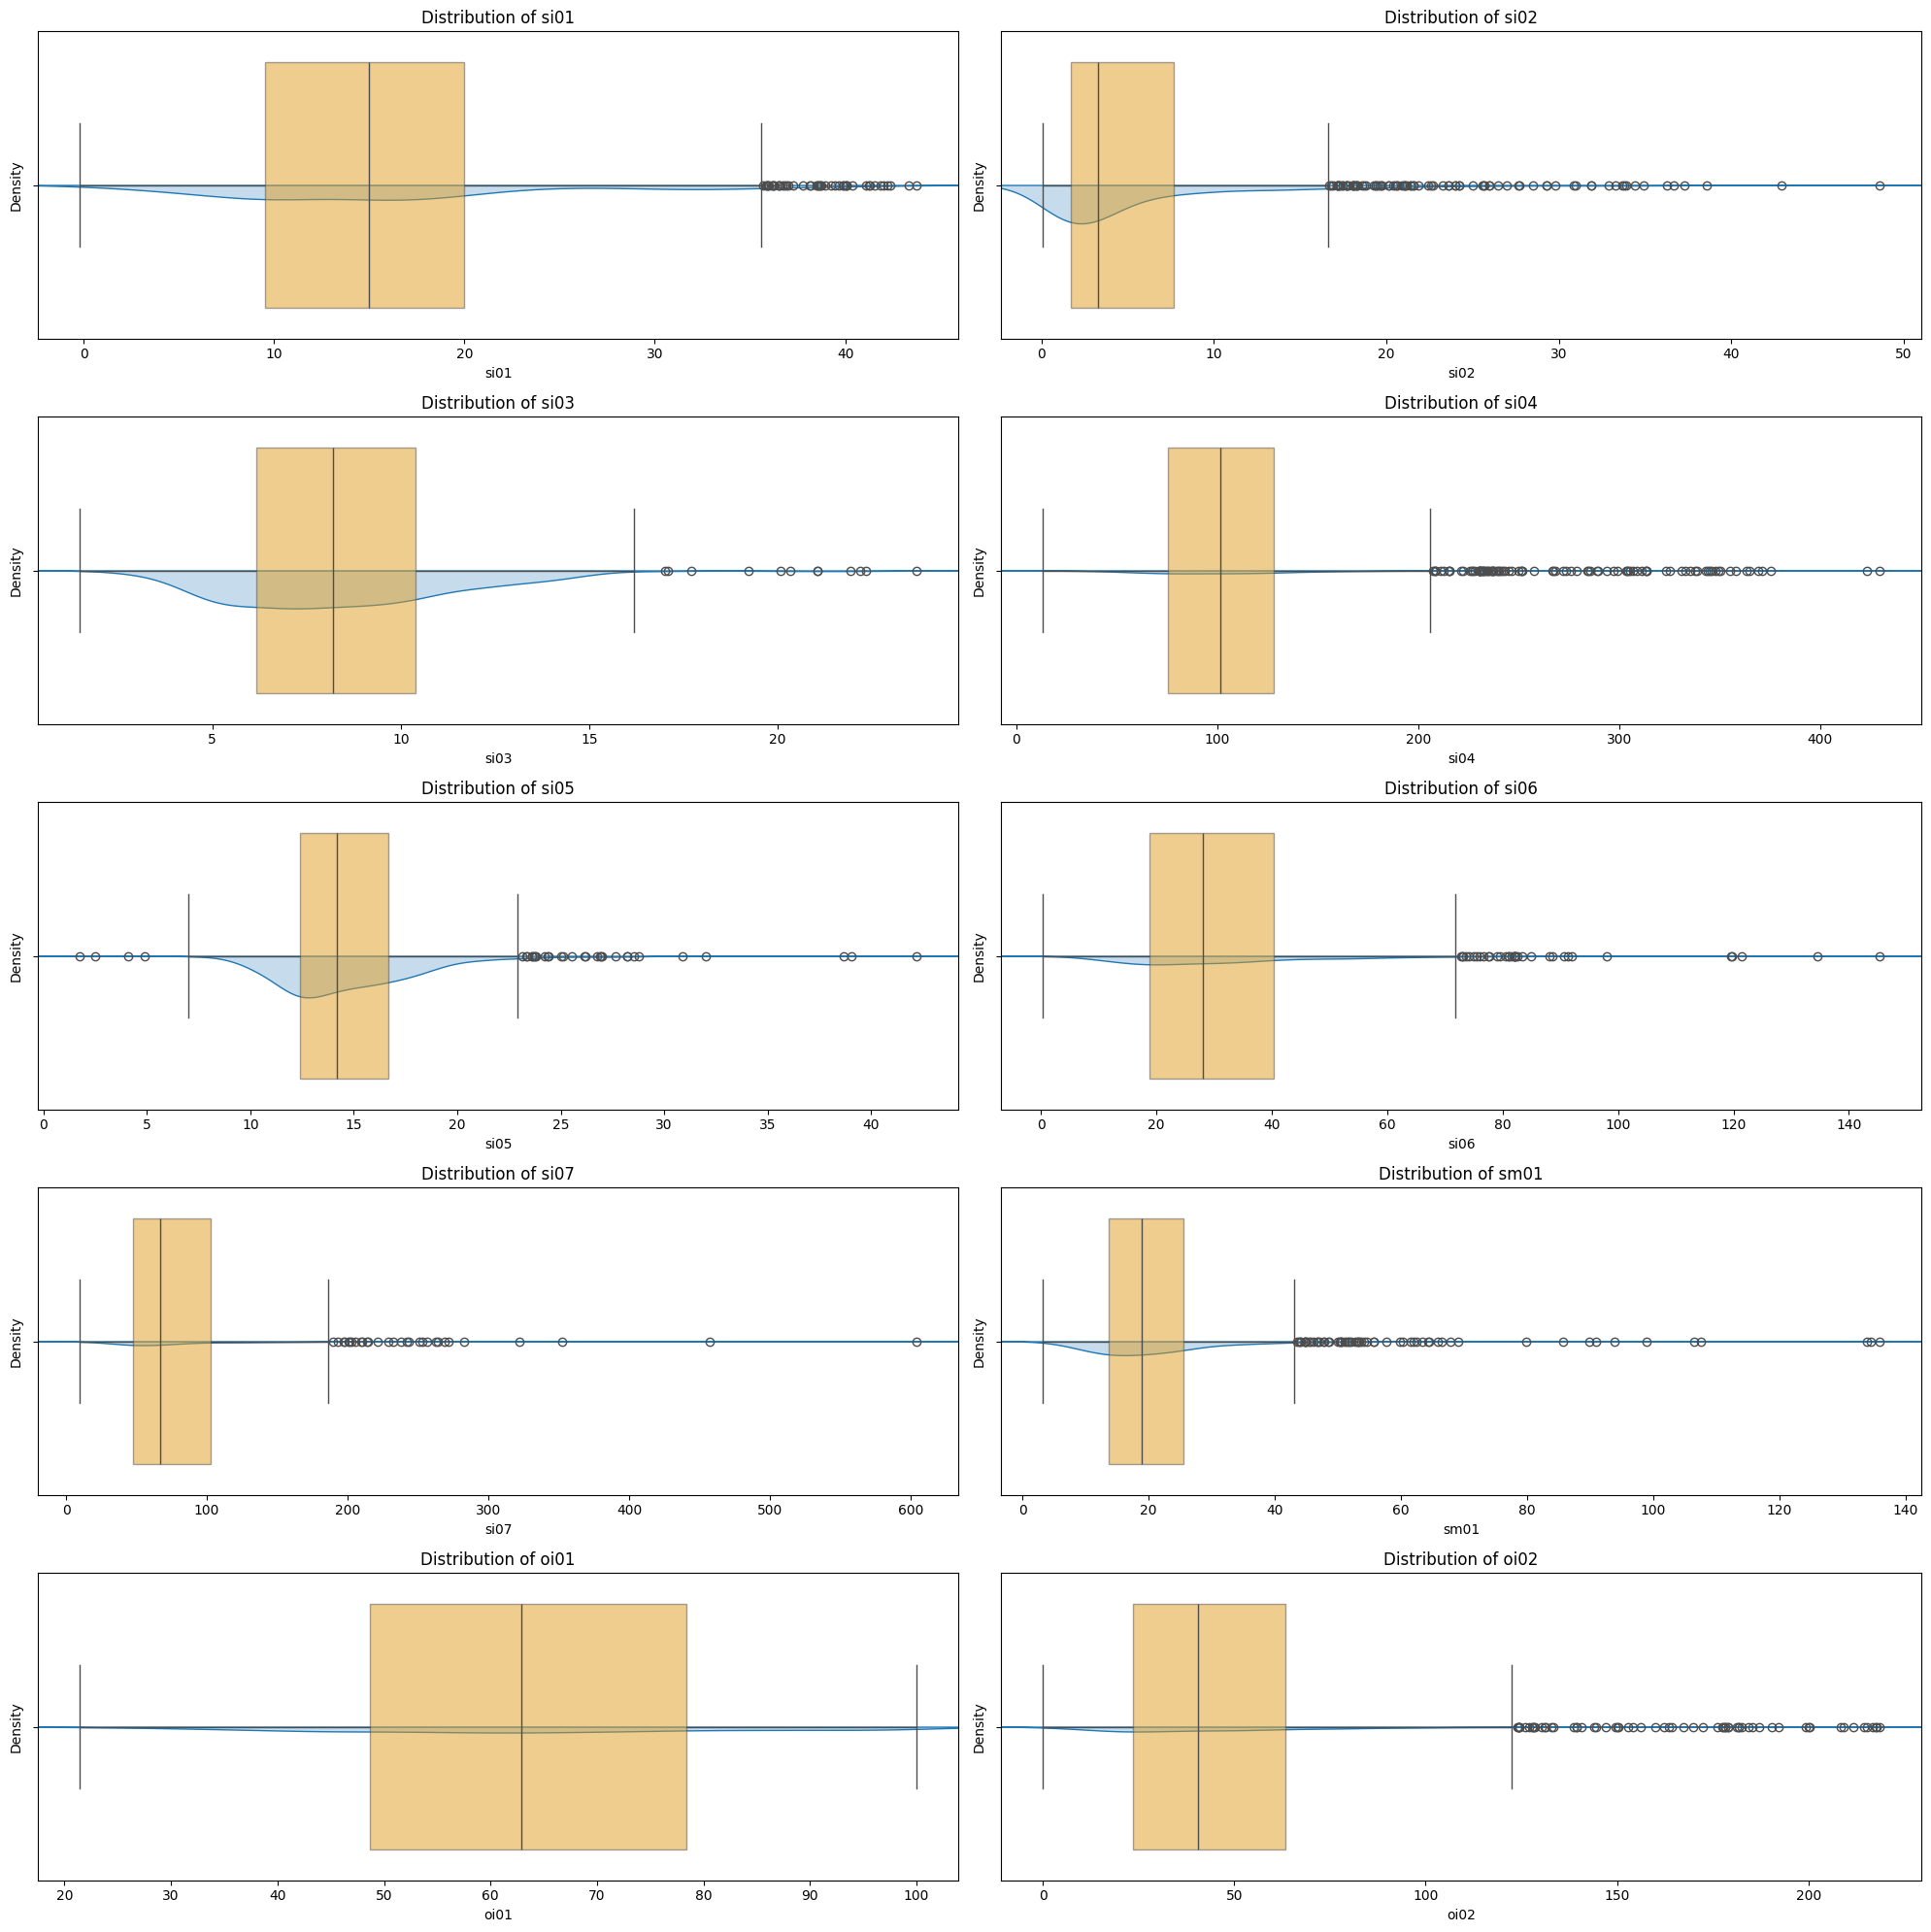

In [22]:

columns = ['si01', 'si02', 'si03', 'si04', 'si05', 'si06', 'si07', 'sm01', 'oi01', 'oi02']

fig, axes = plt.subplots(5, 2, figsize=(20, 20))

for i, ax in enumerate(axes.flat):
    sns.kdeplot(data=merged_df, x=columns[i], ax=ax, fill=True)
    sns.boxplot(data=merged_df, x=columns[i], ax=ax, color='orange', boxprops=dict(alpha=0.5))
    ax.set_title(f'Distribution of {columns[i]}')

plt.tight_layout()
plt.show()



# Summary of data exploration

### Time period distribution
- Most of the features have data from 1998 to 2020, except for 'si01', 'oi02' and 'sm01' which have data from 1983 to 2021.
- This indicates that we should train the main model on 1998-2020 data and use the 1983-2021 data for tuning

### Region distribution
- Overall, the data is quite balanced among the regions, with most regions having around 150-2000 data points.
- Although there are some countries, like Angola, Central African Republic, and Zimbabwe, that have less than 100 data points. Oversampling these regions may not make significant improvements. It may even introduce noise to the model. So at this time we decide to keep the data as is.

### Target value distribution
- Target value 0 has around 1800 data points, while target value 1 has only around 500.
- We should consider resampling the target value 1 data points.

### Feature distribution
- Most of the features have a right-skewed distribution, with some outliers.
- They include si01, si02, si03, si04, si05, si06, si07, sm01, oi02
- We would conduct box-cox transformation on these features to make them more normally distributed.


# Data preprocessing and feature engineering
In this part, we will preprocess the data and tackle the skewness and outliers in the data.
- Drop the rows with NaN in target value 'Banking Crisis '
- Since this is a relatively small dataset, we could use knn imputer to fill in the missing data
- Some of the data are country-specific, we should standardize and transform the data by country
- Use Yeo-Johnson transformation to make the data more normally distributed
- Standardize the data with standard scaler
    - We are not using models based on gradient descent
    - After the box-cox transformation, the data is more normally distributed, which is suitable for standard scaler


### Country encoder
- Since some of the columns are country-specific, we should encode the country column.
- The best choice would be one-hot encoding. However, since there are too many countries, one-hot encoding would introduce too many columns.
- We will use target encoding to encode the country column.

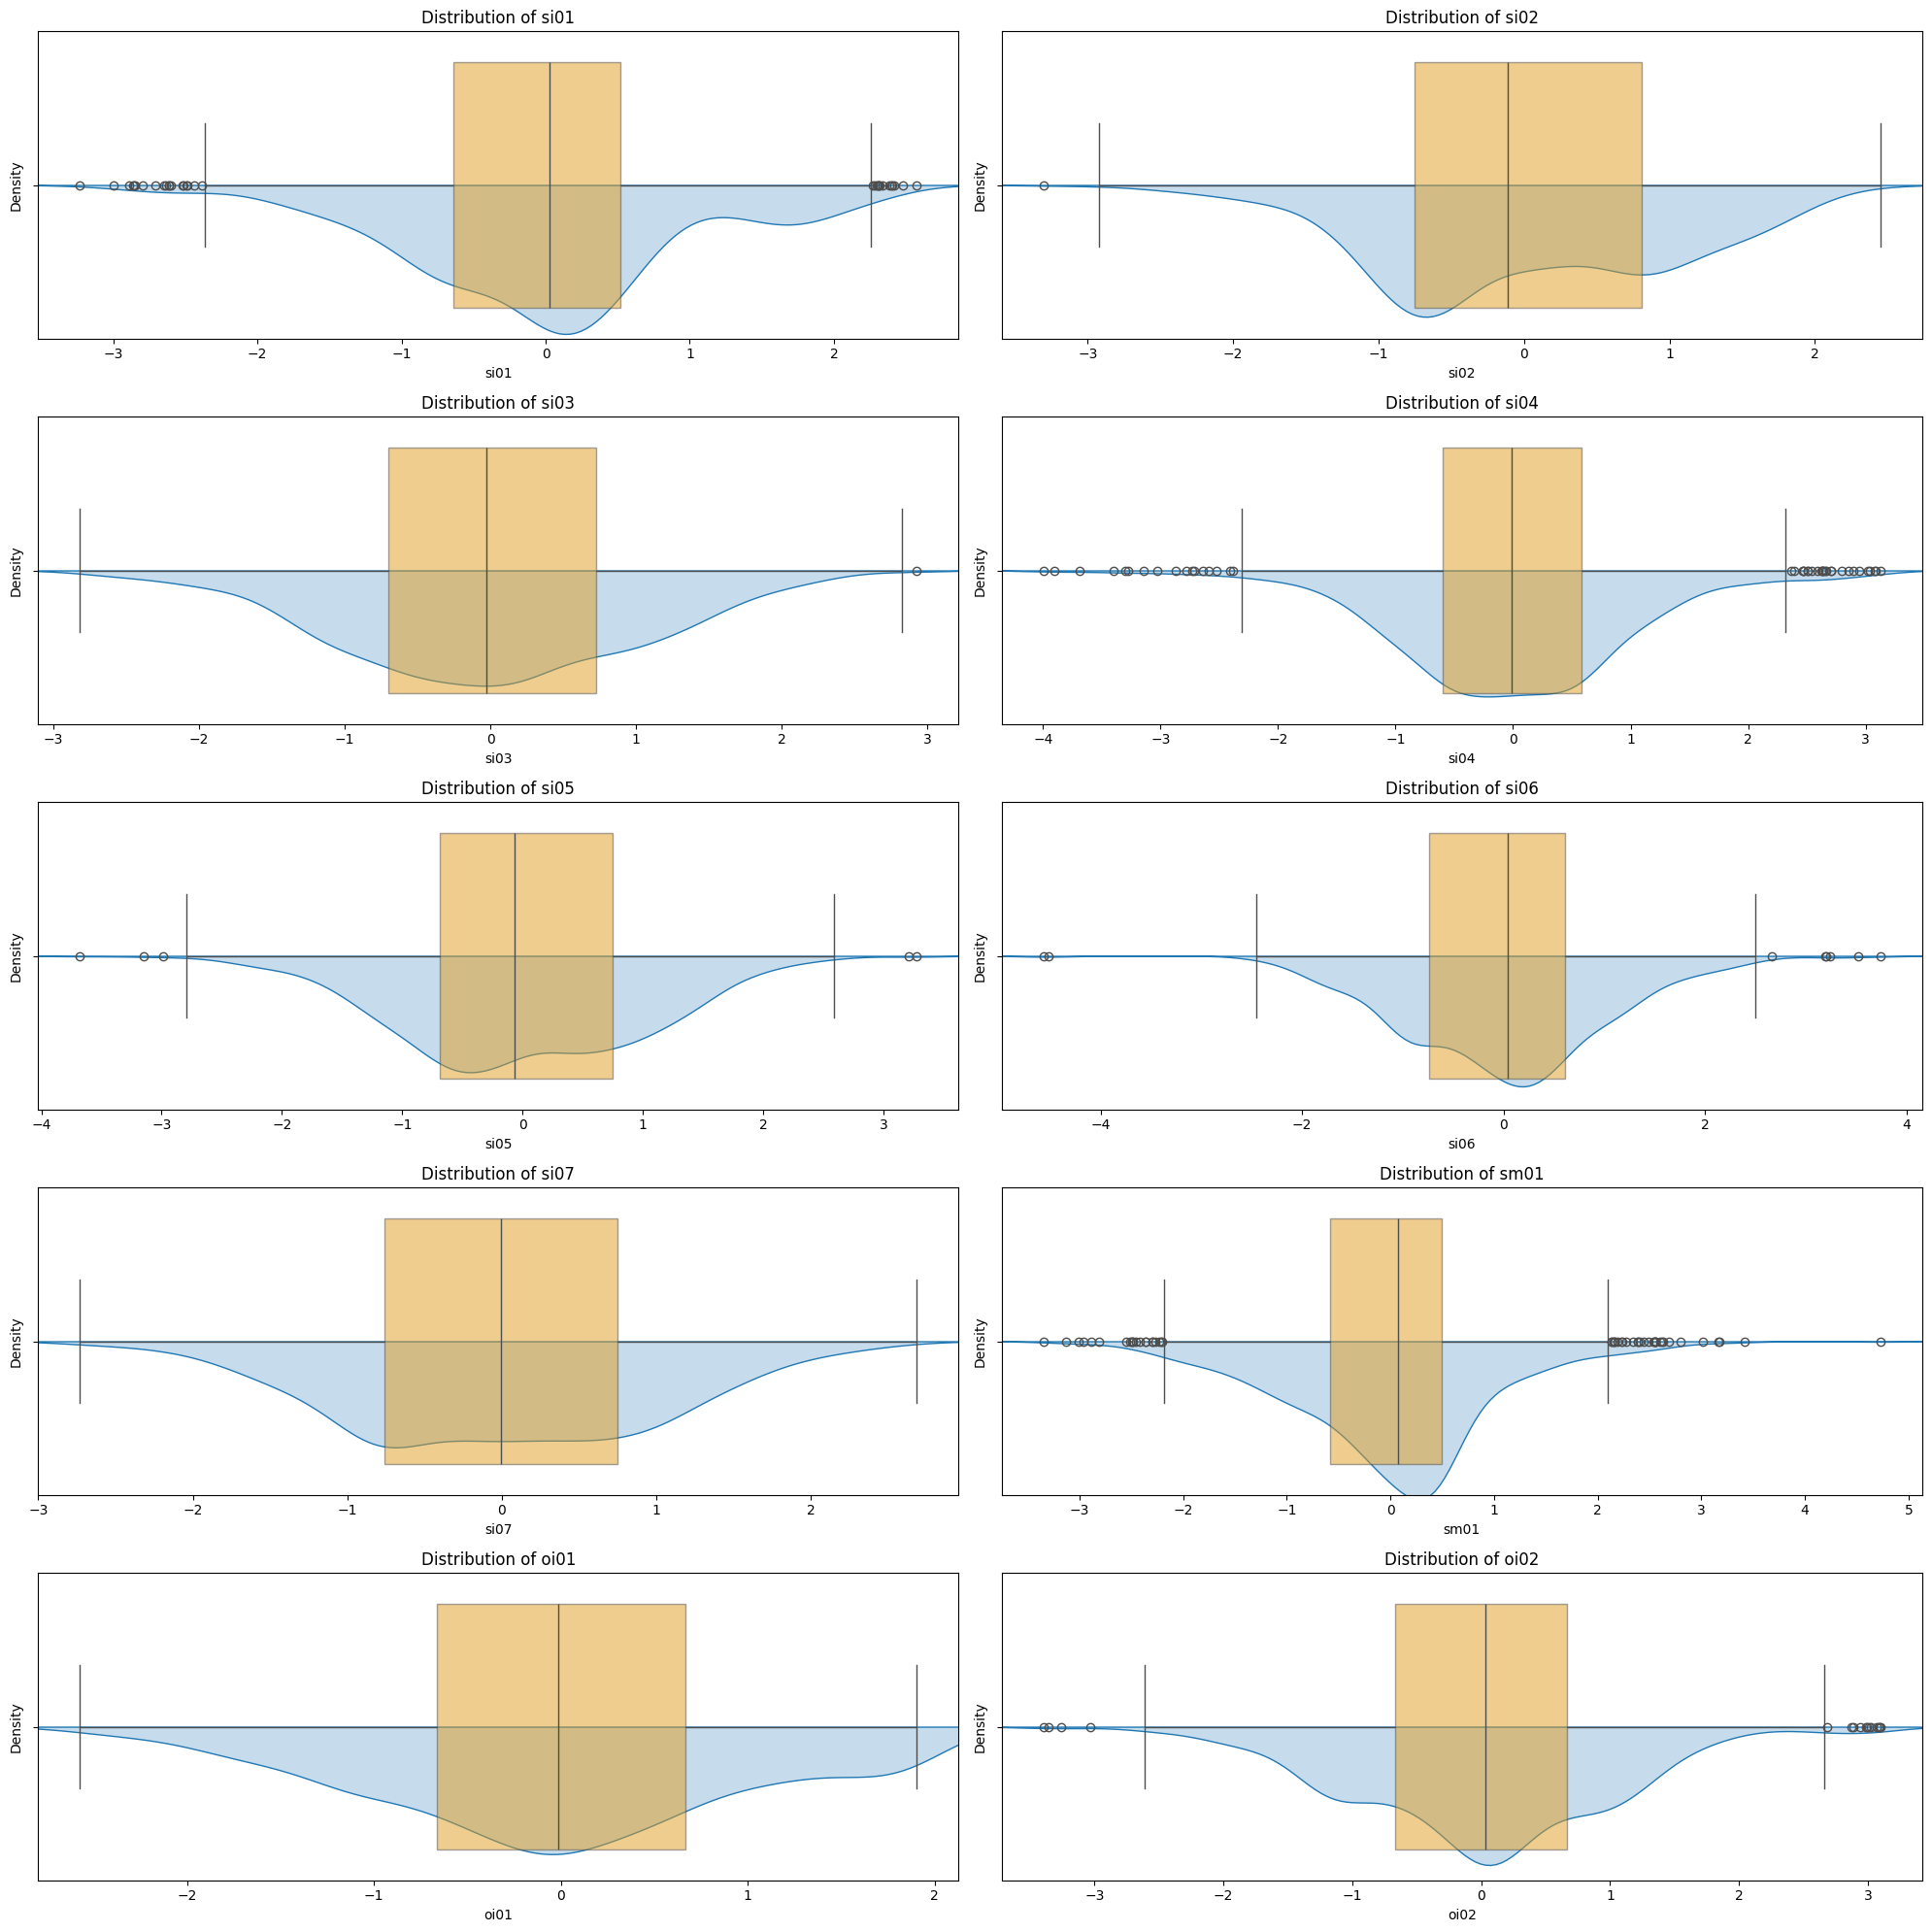

In [23]:
# Drop the rows with NaN vlues in the target data 'Banking Crisis '
merged_df = merged_df.dropna(subset=['Banking Crisis '])
# Only keep the 1998-2021 data
merged_df = merged_df[merged_df['year'] >= 1998]

columns = ['si01', 'si02', 'si03', 'si04', 'si05', 'si06', 'si07', 'sm01', 'oi01', 'oi02']
country_specific_columns = ['si02', 'si03', 'si05', 'si07']

# Use knn to fill the missing values in merged_df
imputer = KNNImputer(n_neighbors=5)
filled_features = imputer.fit_transform(merged_df[columns])
filled_features_df = pd.DataFrame(filled_features, columns=columns)

# Merge the filled_features_df with the merged_df
filled_merged_df = pd.concat([merged_df[['iso3', 'year', 'country', 'Banking Crisis ']].reset_index(drop=True), filled_features_df], axis=1)

# Normalize country-specific features within each country
for col in country_specific_columns:
    filled_merged_df[col] = filled_merged_df.groupby('iso3')[col].transform(lambda x: (x - x.mean()) / x.std())


# Use Yeo-Johnson transformation to transform the features
pt = PowerTransformer(method='yeo-johnson')
transformed_features = pt.fit_transform(filled_merged_df[columns])
transformed_filled_merged_df = pd.DataFrame(transformed_features, columns=columns)

# Standardize the features with StandardScaler
scaler = StandardScaler()
transformed_filled_merged_df[columns] = scaler.fit_transform(transformed_filled_merged_df[columns])

final_transformed_df = pd.concat([filled_merged_df[['iso3', 'year', 'country', 'Banking Crisis ']].reset_index(drop=True), transformed_filled_merged_df], axis=1)


fig, axes = plt.subplots(5, 2, figsize=(20, 20))


for i, ax in enumerate(axes.flat):
    sns.kdeplot(data=final_transformed_df, x=columns[i], ax=ax, fill=True)
    sns.boxplot(data=final_transformed_df, x=columns[i], ax=ax, color='orange', boxprops=dict(alpha=0.5))
    ax.set_title(f'Distribution of {columns[i]}')

plt.tight_layout()
plt.show()




# Train-test split
In this part we are going to split this dataset into training and testing set, to do so we will set 1998-2017 data as training set and 2018-2020 data as testing set. The rest of the data will be used as validation set, which will not be influenced by any tuning process and can be used to evaluate the final model.

The reason why we choose not to randomly split the data is that the data is time-series data. Any random split would cause data leakage, making the evaluation overly optimistic.

In [24]:
# Get 1998-2017 data as training set and 2018-2020 data as test set, and set 2021 data as validation set
final_transformed_df = final_transformed_df.dropna(subset=['Banking Crisis '])
training_set = final_transformed_df[final_transformed_df['year'] < 2014]
test_set = final_transformed_df[(final_transformed_df['year'] >= 2014) & (final_transformed_df['year'] <= 2015)]

X_train = training_set.drop(columns=['Banking Crisis '])
y_train = training_set['Banking Crisis ']

X_test = test_set.drop(columns=['Banking Crisis '])
y_test = test_set['Banking Crisis ']


print(final_transformed_df)

     iso3  year   country  Banking Crisis       si01      si02      si03  \
0     AGO  1998    Angola              1.0 -0.808752  0.730707  1.321713   
1     AGO  1999    Angola              0.0 -0.540027  0.340470 -0.215349   
2     AGO  2000    Angola              0.0  0.743267 -0.123186  0.915108   
3     AGO  2001    Angola              0.0 -0.573436  0.984750  0.438353   
4     AGO  2002    Angola              0.0 -1.083306  0.984750  1.045636   
...   ...   ...       ...              ...       ...       ...       ...   
1129  ZWE  2010  Zimbabwe              0.0 -1.639021 -0.035878  0.273191   
1130  ZWE  2011  Zimbabwe              0.0 -1.548858 -0.945331 -0.982893   
1131  ZWE  2012  Zimbabwe              0.0 -1.459390 -0.236254  0.356510   
1132  ZWE  2013  Zimbabwe              0.0 -1.487521 -0.945331 -0.982893   
1133  ZWE  2014  Zimbabwe              0.0 -1.538422 -0.508644 -0.929403   

          si04      si05      si06      si07      sm01      oi01      oi02  
0    -3.27

In [25]:

# Employ target encoding with smoothing for the 'country' column
smoothing = 0.3
target_encoder = ce.TargetEncoder(cols=['iso3'], smoothing=smoothing)
X_train['iso3'] = target_encoder.fit_transform(X_train['iso3'], y_train)
X_test['iso3'] = target_encoder.transform(X_test['iso3'])
# Drop country and year column
X_train = X_train.drop(columns=['country', 'year'])
X_test = X_test.drop(columns=['country', 'year'])


# Oversampling
Now we have splited the data into training, testing and validating set. However, according to our previous exploration, the dataset is unbalanced, which may cause the model to be biased towards the majority class. To solve this problem, we will oversample the minority class.

### Oversampling method selection
- We will test the performance of the model with different oversampling methods on a random forest model. The methods include:
    - `Random oversampling`: Randomly duplicate the minority class
    - `SMOTE`: Synthetic Minority Over-sampling Technique
    - `ADASYN`: Adaptive Synthetic Sampling Approach
    - `SMOTEENN`: SMOTE + Edited Nearest Neighbors
    - `SMOTETomek`: SMOTE + Tomek links
    - `BorderlineSMOTE`: Borderline SMOTE


In [26]:

def oversample_data(sampler,X,y):
    return(sampler.fit_resample(X, y))

def perf_metrics(y_true, y_pred_binary):
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred_binary)
    balanced_accuracy = balanced_accuracy_score(y_true, y_pred_binary)
    precision = precision_score(y_true, y_pred_binary,average='binary')
    recall = recall_score(y_true, y_pred_binary,average='binary')
    f1 = f1_score(y_true, y_pred_binary,average='binary')

    # Create dictionary to store metrics
    metrics_dict = {
        'accuracy': round(accuracy*100,2),
        'balanced_accuracy' : round(balanced_accuracy*100,2),
        'precision': round(precision*100,2),
        'recall': round(recall*100,2),
        'f1_score': round(f1*100,2)
    }

    return metrics_dict


sampling_ratios = np.linspace(0.4, 1, 7)
# Build a base model to compare the performance of different sampling methods
base_model = DecisionTreeClassifier(random_state=42)

perf_os_algo = pd.DataFrame(columns=['sampling_ratio', 'algorithm', 'accuracy', 'balanced_accuracy','precision','recall','f1_score'])

# Build a base model to compare the resample methods
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

# OUTPUT
print("Performance of Decision tree with the original data (Without Synthetic train samples)")
baseline_perf = pd.DataFrame.from_dict([perf_metrics(np.array(y_test.astype(int)),np.array(y_pred.astype(int)))])



for ratio in sampling_ratios:

    # Creating Oversamplers
    RANDOMOS_obj = RandomOverSampler(sampling_strategy=ratio, random_state = 42)
    SMOTE_obj = SMOTE(sampling_strategy=ratio, random_state = 42)
    ADASYN_obj = ADASYN(sampling_strategy=ratio,random_state = 42)
    SMOTEENN_obj = SMOTEENN(sampling_strategy=ratio,random_state = 42)
    SMOTETomek_obj = SMOTETomek(sampling_strategy=ratio, random_state = 42)
    BORDERSMOTE_obj = BorderlineSMOTE(sampling_strategy=ratio,random_state = 42)

    # Oversampled train samples
    X_train_os1, y_train_os1 = oversample_data(RANDOMOS_obj,X_train,y_train)
    X_train_os2, y_train_os2 = oversample_data(SMOTE_obj,X_train,y_train)
    X_train_os3, y_train_os3 = oversample_data(ADASYN_obj,X_train,y_train)
    X_train_os4, y_train_os4 = oversample_data(SMOTEENN_obj,X_train,y_train)
    X_train_os5, y_train_os5 = oversample_data(SMOTETomek_obj,X_train,y_train)
    X_train_os6, y_train_os6 = oversample_data(BORDERSMOTE_obj,X_train,y_train)


    # Preparing train samples for testing the performance
    X_train_oversampled_list = [X_train_os1,X_train_os2,X_train_os3,X_train_os4,X_train_os5,X_train_os6]
    y_train_oversampled_list = [y_train_os1,y_train_os2,y_train_os3,y_train_os4,y_train_os5,y_train_os6]
    oversampling_algo_list = ["Random oversampling" ,"SMOTE", "ADASYN", "SMOTEENN","SMOTE Tomek","Borderline SMOTE"]

    for X_tr_set, y_tr_set, algo in zip(X_train_oversampled_list, y_train_oversampled_list,oversampling_algo_list):

        # Fitting decision tree classifer on SMOTED train data
        base_model.fit(X_tr_set, y_tr_set)

        # Predicting
        y_pred = base_model.predict(X_test)

        # Saving performance metrics to a dataframe
        perf_of_algo = perf_metrics(np.array(y_test.astype(int)),np.array(y_pred.astype(int)))
        perf_of_algo['sampling_ratio'] = ratio
        perf_of_algo['algorithm'] = algo

        perf_os_algo = pd.concat([perf_os_algo, pd.DataFrame([perf_of_algo])], ignore_index=True)

# OUTPUT
print("### Performance of the baseline model ###")
print(baseline_perf)

# OUTPUT
print("Top SMOTED model results by precision : ")
print(perf_os_algo.sort_values(by=['precision'], ascending=False).head(5))
print("Top SMOTED model results by recall : ")
print(perf_os_algo.sort_values(by=['recall'], ascending=False).head(5))
print("Top SMOTED model results by f1 score : ")
print(perf_os_algo.sort_values(by=['f1_score','recall','precision'], ascending=False).head(5))



Performance of Decision tree with the original data (Without Synthetic train samples)
### Performance of the baseline model ###
   accuracy  balanced_accuracy  precision  recall  f1_score
0     92.31              85.61      81.82    75.0     78.26
Top SMOTED model results by precision : 
    sampling_ratio            algorithm  accuracy  balanced_accuracy  \
35             0.9     Borderline SMOTE     90.77              81.45   
16             0.6          SMOTE Tomek     93.85              93.00   
30             0.9  Random oversampling     89.23              77.28   
13             0.6                SMOTE     92.31              88.84   
36             1.0  Random oversampling     87.69              73.11   

    precision  recall  f1_score  
35      80.00   66.67     72.73  
16      78.57   91.67     84.62  
30      77.78   58.33     66.67  
13      76.92   83.33     80.00  
36      75.00   50.00     60.00  
Top SMOTED model results by recall : 
    sampling_ratio         algorithm

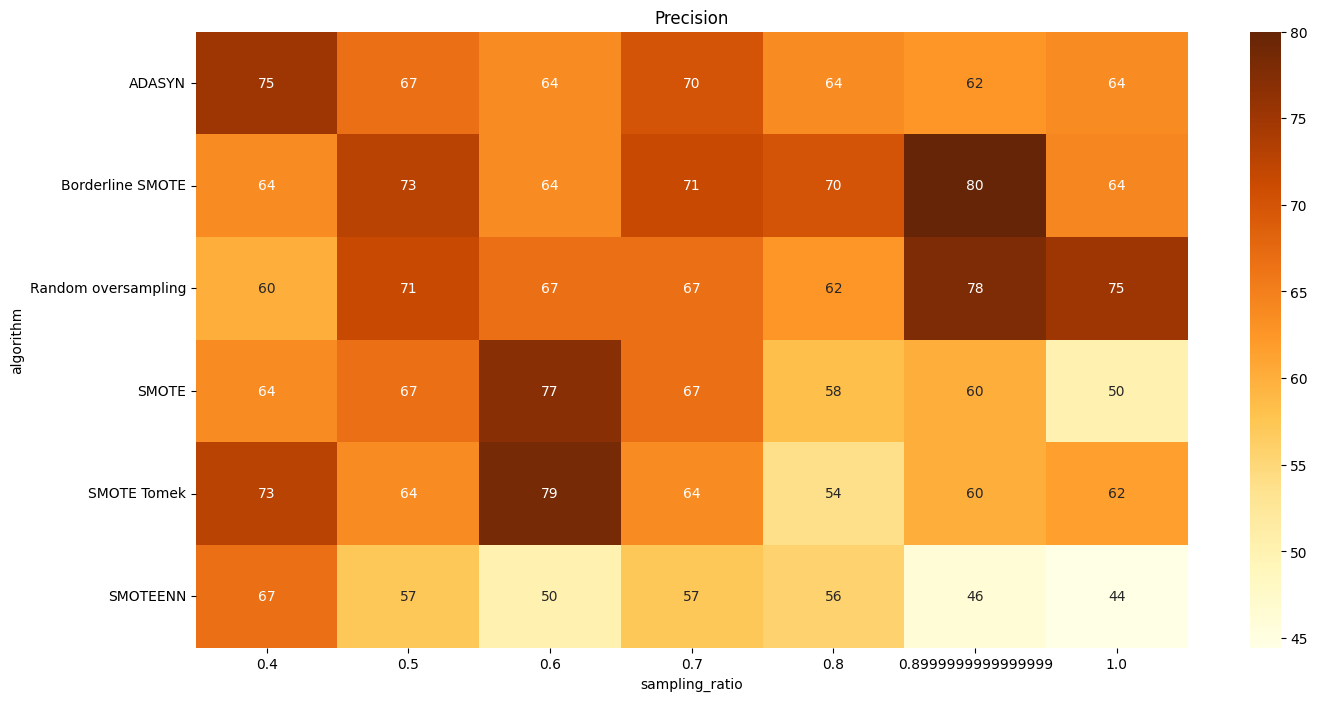

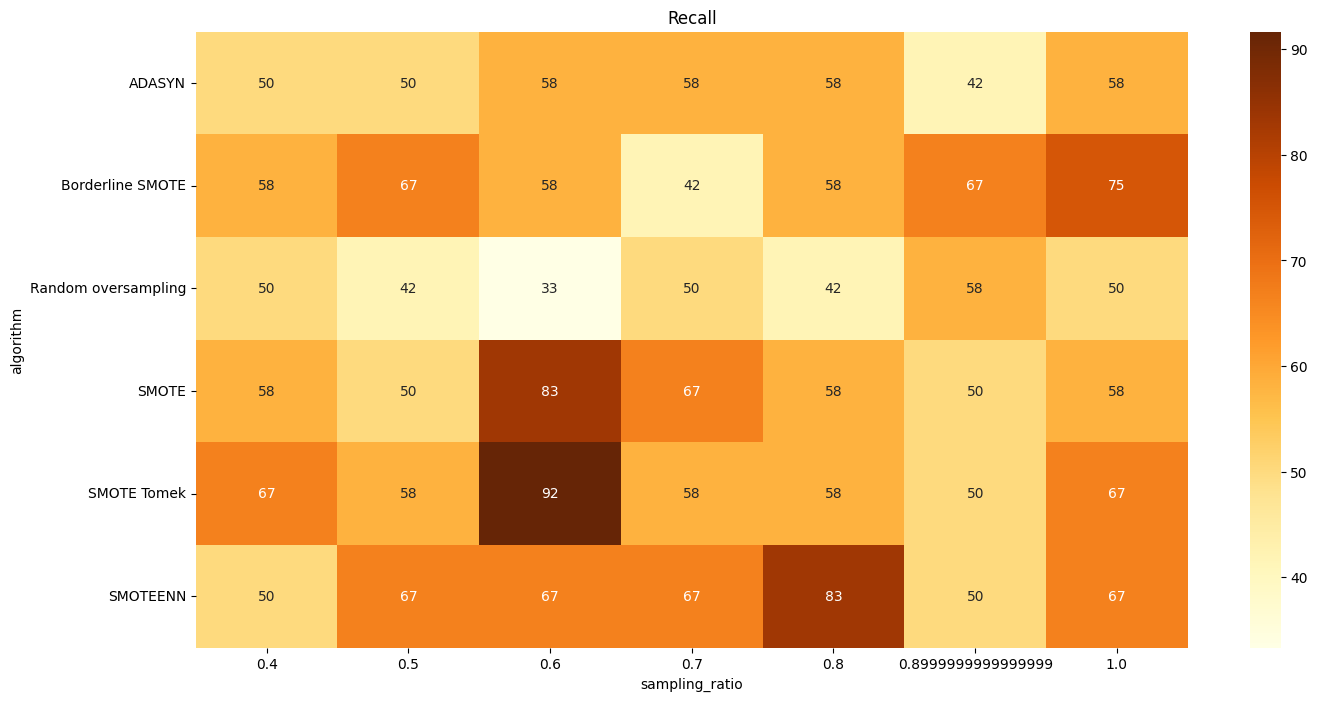

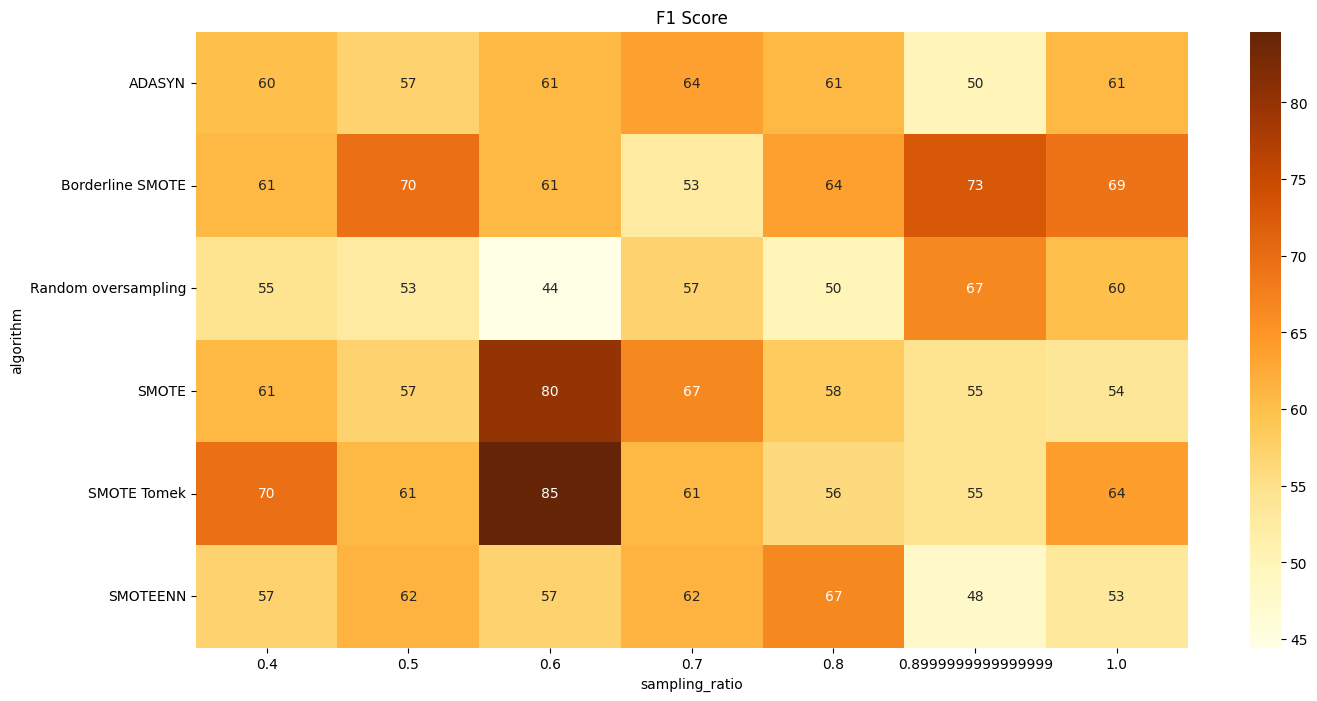

In [27]:
dark_light_blue_cmap = sns.diverging_palette(240, 10, n=9)

# Plot heatmap, x-axis: sampling_ratio, y-axis: algorithm, color: precision
plt.figure(figsize=(16, 8))
pivot_table = perf_os_algo.pivot(index='algorithm', columns='sampling_ratio', values='precision')
sns.heatmap(pivot_table, annot=True, cmap='YlOrBr')
plt.title("Precision")
plt.show()

# Plot heatmap, x-axis: sampling_ratio, y-axis: algorithm, color: recall
plt.figure(figsize=(16, 8))
pivot_table = perf_os_algo.pivot(index='algorithm', columns='sampling_ratio', values='recall')
sns.heatmap(pivot_table, annot=True, cmap='YlOrBr')
plt.title("Recall")
plt.show()

# Plot heatmap, x-axis: sampling_ratio, y-axis: algorithm, color: f1_score
plt.figure(figsize=(16, 8))
pivot_table = perf_os_algo.pivot(index='algorithm', columns='sampling_ratio', values='f1_score')
sns.heatmap(pivot_table, annot=True, cmap='YlOrBr')
plt.title("F1 Score")
plt.show()

# Oversampling method choice
Based on the performance of the 6 oversampling methods, we should choose SMOTE Tomek, with 79% Precision, 92% Recall, and 85% F1 score.

# Model Config (XGBoost)
We use a xgboost model as our main model. Now we will set up the model configuration.

- After the training and tuning process, we will find the best hyperparameters for the xgboost model:
```python
Best_accuracy =  0.8840426582403476
Best_parameters = {'subsample': np.float64(0.65), \
                    'n_estimators': 250, \
                    'min_child_weight': 2, \
                    'max_depth': 6, \
                    'learning_rate': np.float64(0.03111111111111111), \
                    'gamma': 0.3, \
                    'colsample_bytree': np.float64(0.325)\
                    }
```

In [29]:
SMOTETomek_obj = SMOTETomek(sampling_strategy=0.6, random_state = 42)
X_train_os, y_train_os = oversample_data(SMOTETomek_obj,X_train,y_train)


trained_model_xgboost_path = "model/xgboost_model.pkl"
os_path = "model/os.pkl"

xgb_model = XGBClassifier(random_state=42)


params = {
    'n_estimators': [190,200,250,300],
    'max_depth': [5,6,7],
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'subsample': np.linspace(0.6, 0.8, 5),
    'colsample_bytree': np.linspace(0.2, 0.45, 5),
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'min_child_weight': [1, 2, 3, 4]
}


random_search = RandomizedSearchCV(xgb_model, param_distributions=params,
                                n_iter=75, scoring='accuracy',
                                n_jobs=-1, cv=5, random_state=42)
# Fit with categorical variables
random_search.fit(X_train_os, y_train_os)

# OUTPUT
# Print the best score
print("Best accuracy: ", random_search.best_score_)

# Print the best parameters
print("Best parameters: ", random_search.best_params_)

# Get teh best model and store in the trained_model path "model/xgboost_model.pkl"
best_model = random_search.best_estimator_
with open(trained_model_xgboost_path, 'wb') as file:
    pickle.dump(best_model, file)

with open(os_path, 'wb') as file:
    pickle.dump(SMOTETomek_obj, file)

Best accuracy:  0.8894366197183098
Best parameters:  {'subsample': 0.65, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.07333333333333333, 'gamma': 0.2, 'colsample_bytree': 0.3875}


In [30]:
# Load the model
with open(trained_model_xgboost_path, 'rb') as file:
    model = pickle.load(file)

y_pred = model.predict(X_test)

# Calculate the matrix
cm_xgboost = confusion_matrix(y_test, y_pred)
cr_xgboost = classification_report(y_test, y_pred, output_dict=True)

# OUTPUT
print("Confusion Matrix")
print(cm_xgboost)
print("Classification Report")
print(cr_xgboost)
# Calculate the ROC AUC score and plot the ROC curve
y_pred_proba = model.predict_proba(X_test)
roc_auc_xgboost = roc_auc_score(y_test, y_pred_proba[:, 1])
print("ROC AUC score: ", roc_auc_xgboost)

Confusion Matrix
[[52  1]
 [ 6  6]]
Classification Report
{'0.0': {'precision': 0.896551724137931, 'recall': 0.9811320754716981, 'f1-score': 0.9369369369369369, 'support': 53.0}, '1.0': {'precision': 0.8571428571428571, 'recall': 0.5, 'f1-score': 0.631578947368421, 'support': 12.0}, 'accuracy': 0.8923076923076924, 'macro avg': {'precision': 0.8768472906403941, 'recall': 0.7405660377358491, 'f1-score': 0.784257942152679, 'support': 65.0}, 'weighted avg': {'precision': 0.8892762410003789, 'recall': 0.8923076923076924, 'f1-score': 0.8805631542473649, 'support': 65.0}}
ROC AUC score:  0.9842767295597484


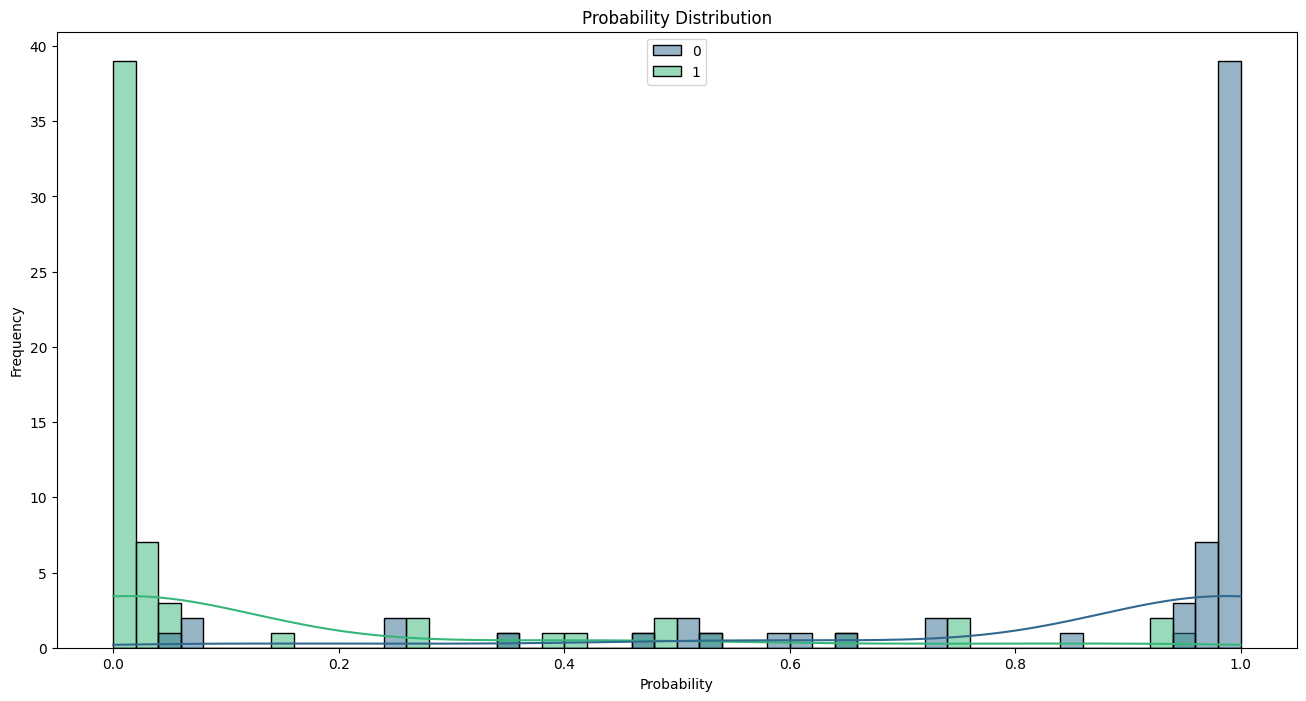

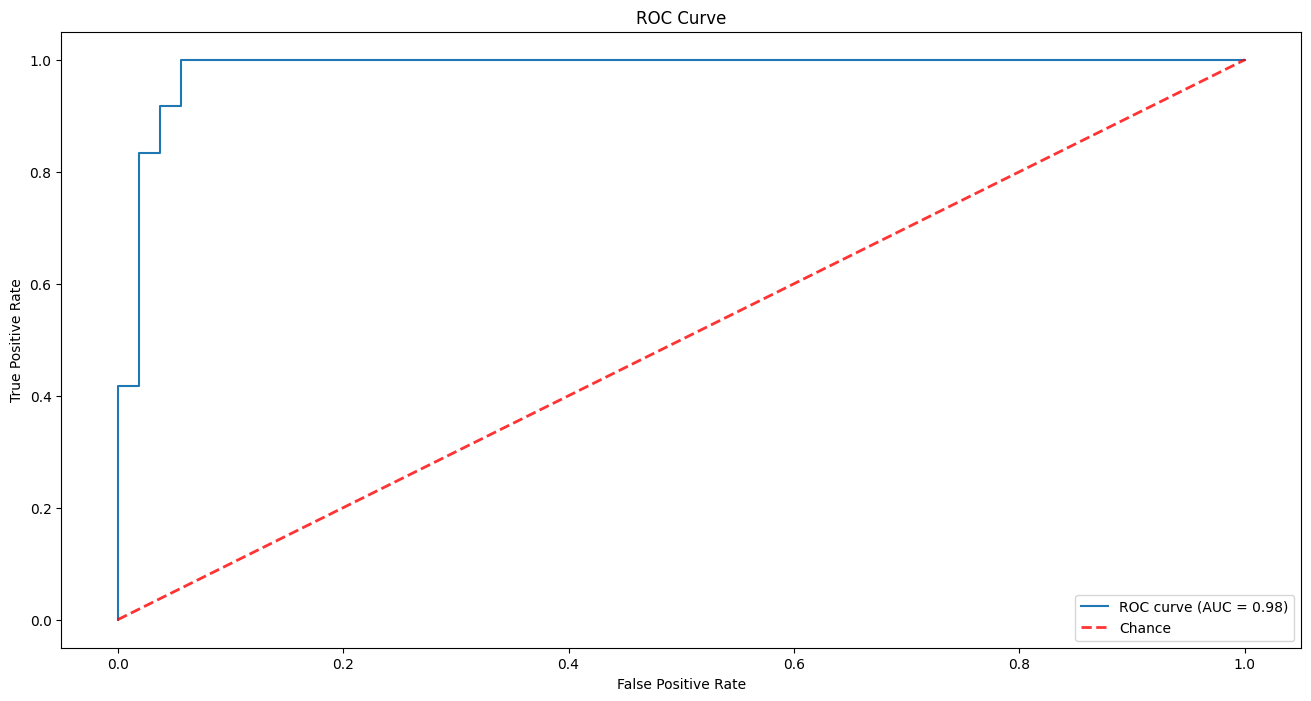

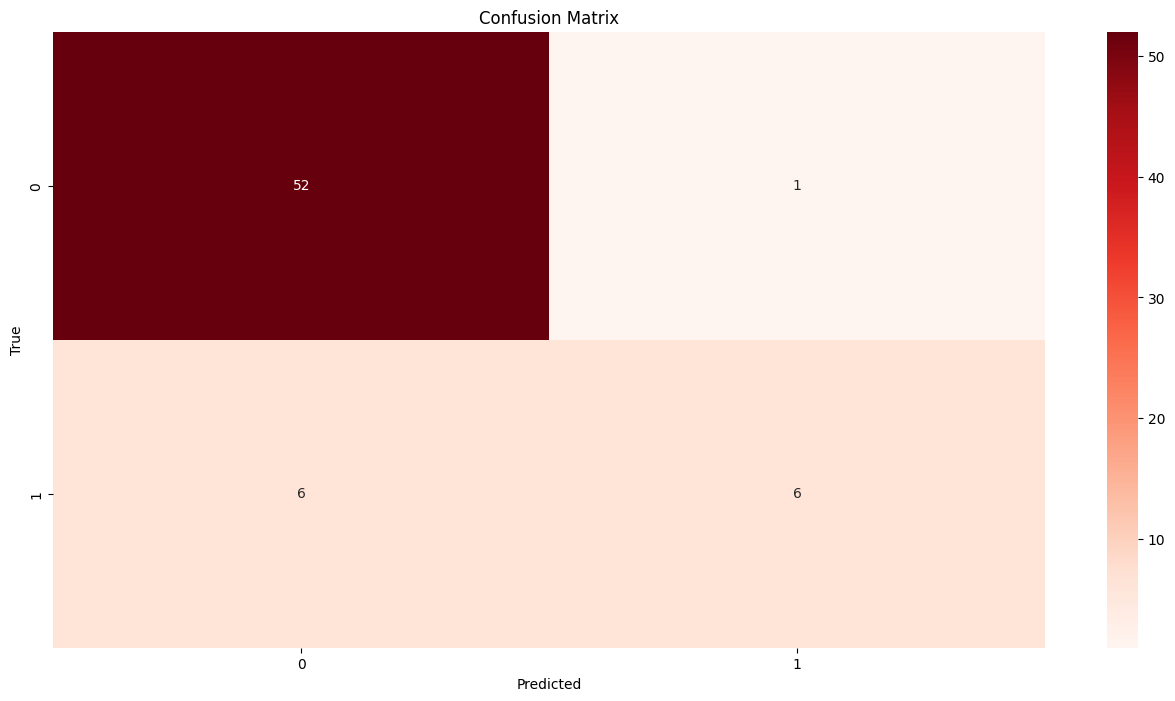

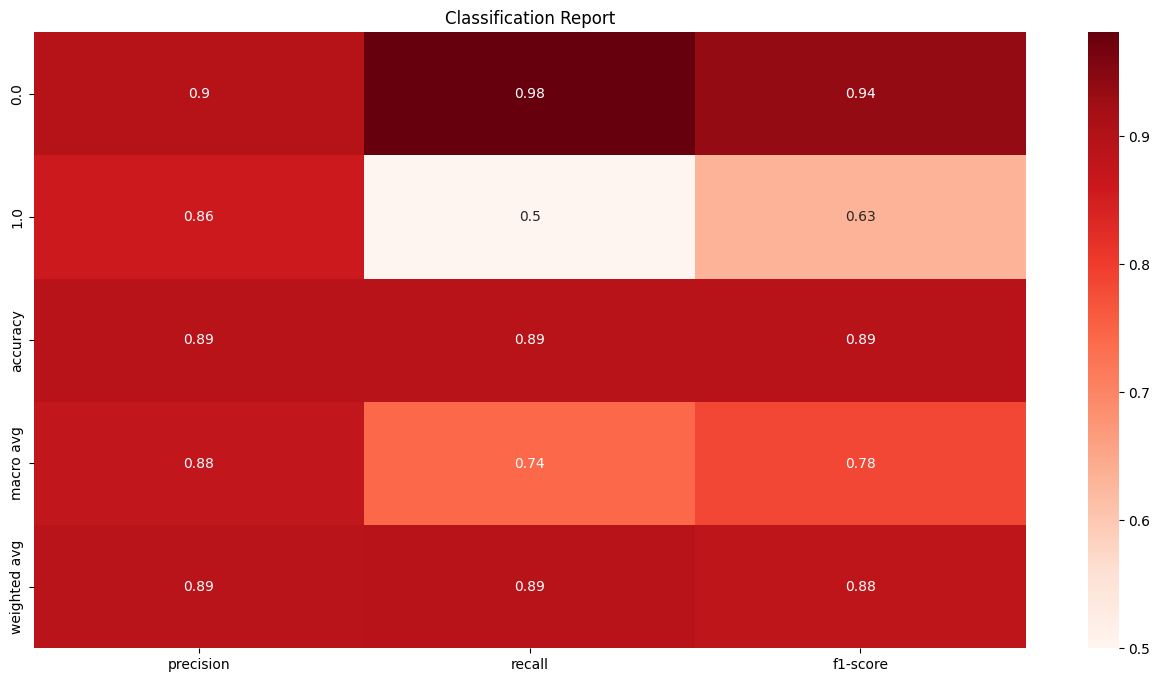

In [31]:
# Plot the probability distribution
plt.figure(figsize=(16, 8))
sns.histplot(y_pred_proba, kde=True, bins=50, palette='viridis')
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.title("Probability Distribution")
plt.show()

# Plot the ROC curve
fig, ax = plt.subplots(figsize=(16, 8))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
ax.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc_xgboost:.2f})")
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Plot the heatmap of the confusion matrix, cmap = reds
plt.figure(figsize=(16, 8))
sns.heatmap(cm_xgboost, annot=True, cmap='Reds', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Plot the classification report, cmap = reds
plt.figure(figsize=(16, 8))
sns.heatmap(pd.DataFrame(cr_xgboost).iloc[:-1, :].T, annot=True, cmap='Reds')
plt.title("Classification Report")
plt.show()

# Model Config (Random Forest)
In this part, we use a random forest model as our model. Now we will set up the model configuration.

```python
Best accuracy:  0.8894366197183098
Best parameters:  {'n_estimators': 190, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 9, 'bootstrap': False}
```

In [32]:
SMOTETomek_obj = SMOTETomek(sampling_strategy=0.6, random_state = 42)
X_train_os, y_train_os = oversample_data(SMOTETomek_obj,X_train,y_train)



trained_model_rf_path = "model/random_forest_model.pkl"
os_path = "model/os.pkl"

random_forest_model = RandomForestClassifier(random_state=42)

params = {
    'n_estimators': [110, 130, 150, 170, 190],
    'max_depth': [7,8,9],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(random_forest_model, param_distributions=params,
                                n_iter=75, scoring='accuracy',
                                n_jobs=-1, cv=5, random_state=42)

random_search.fit(X_train_os, y_train_os)


# OUTPUT
# Print the best score
print("Best accuracy: ", random_search.best_score_)

# Print the best parameters
print("Best parameters: ", random_search.best_params_)

# Get teh best model and store in the trained_model path "model/xgboost_model.pkl"
best_model = random_search.best_estimator_
with open(trained_model_rf_path, 'wb') as file:
    pickle.dump(best_model, file)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
125 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

Best accuracy:  0.8894366197183098
Best parameters:  {'n_estimators': 190, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 9, 'bootstrap': False}


In [33]:
# Load the model
with open(trained_model_rf_path, 'rb') as file:
    model = pickle.load(file)

y_pred = model.predict(X_test)

# Calculate the matrix
cm_rf = confusion_matrix(y_test, y_pred)
cr_rf = classification_report(y_test, y_pred, output_dict=True)

# OUTPUT
print("Confusion Matrix")
print(cm_rf)
print("Classification Report")
print(cr_rf)
# Calculate the ROC AUC score and plot the ROC curve
y_pred_proba = model.predict_proba(X_test)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba[:, 1])
print("ROC AUC score: ", roc_auc_rf)

Confusion Matrix
[[53  0]
 [ 5  7]]
Classification Report
{'0.0': {'precision': 0.9137931034482759, 'recall': 1.0, 'f1-score': 0.9549549549549551, 'support': 53.0}, '1.0': {'precision': 1.0, 'recall': 0.5833333333333334, 'f1-score': 0.7368421052631579, 'support': 12.0}, 'accuracy': 0.9230769230769231, 'macro avg': {'precision': 0.9568965517241379, 'recall': 0.7916666666666667, 'f1-score': 0.8458985301090565, 'support': 65.0}, 'weighted avg': {'precision': 0.9297082228116712, 'recall': 0.9230769230769231, 'f1-score': 0.9146879673195464, 'support': 65.0}}
ROC AUC score:  0.9701257861635221


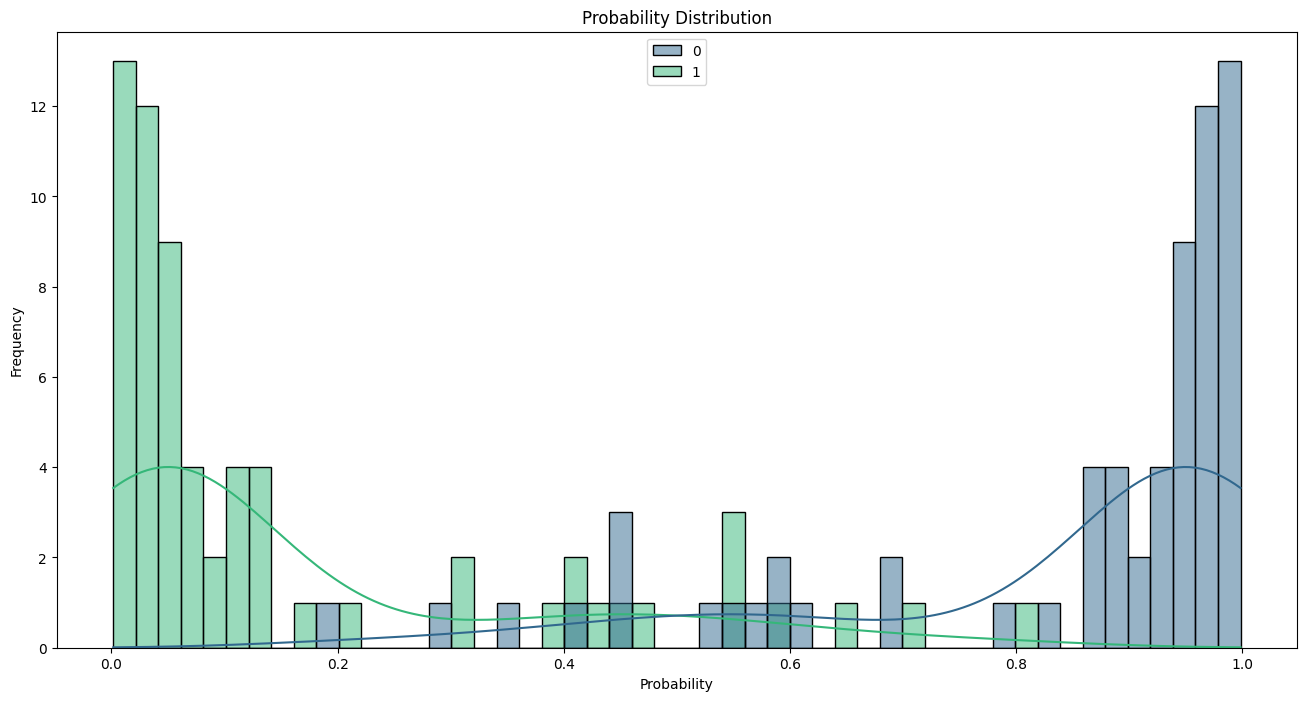

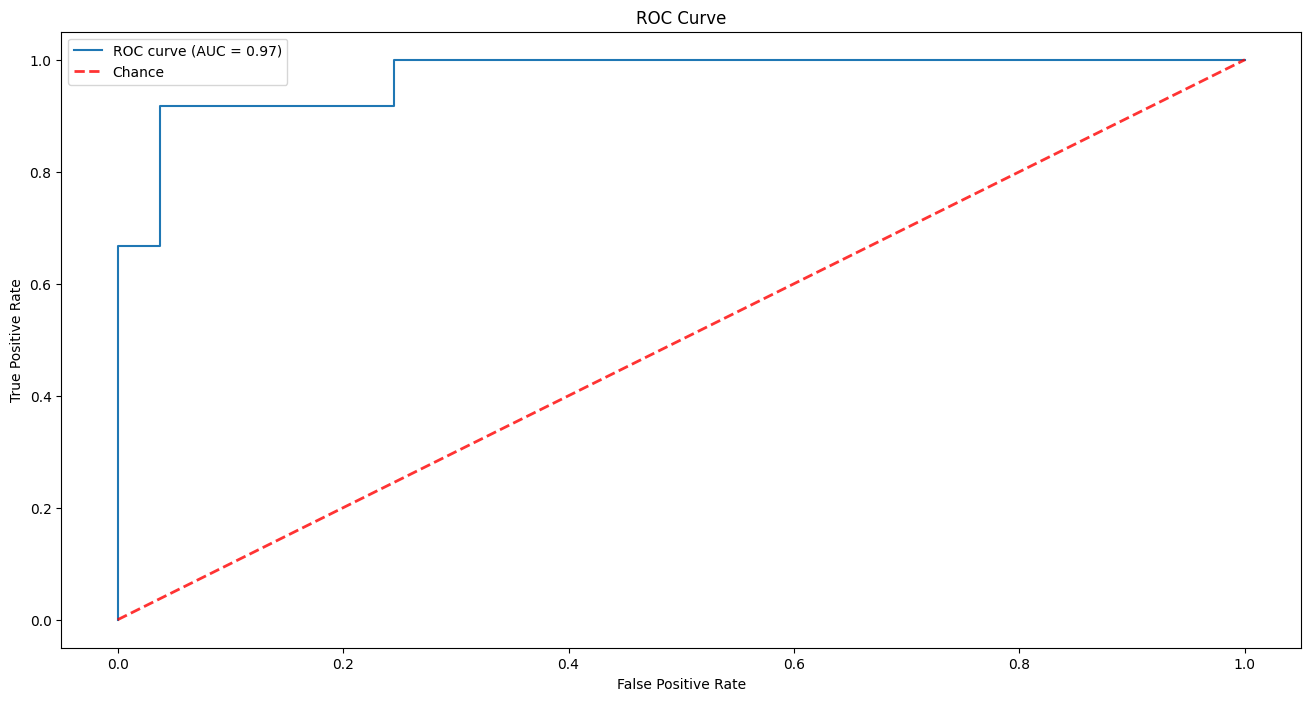

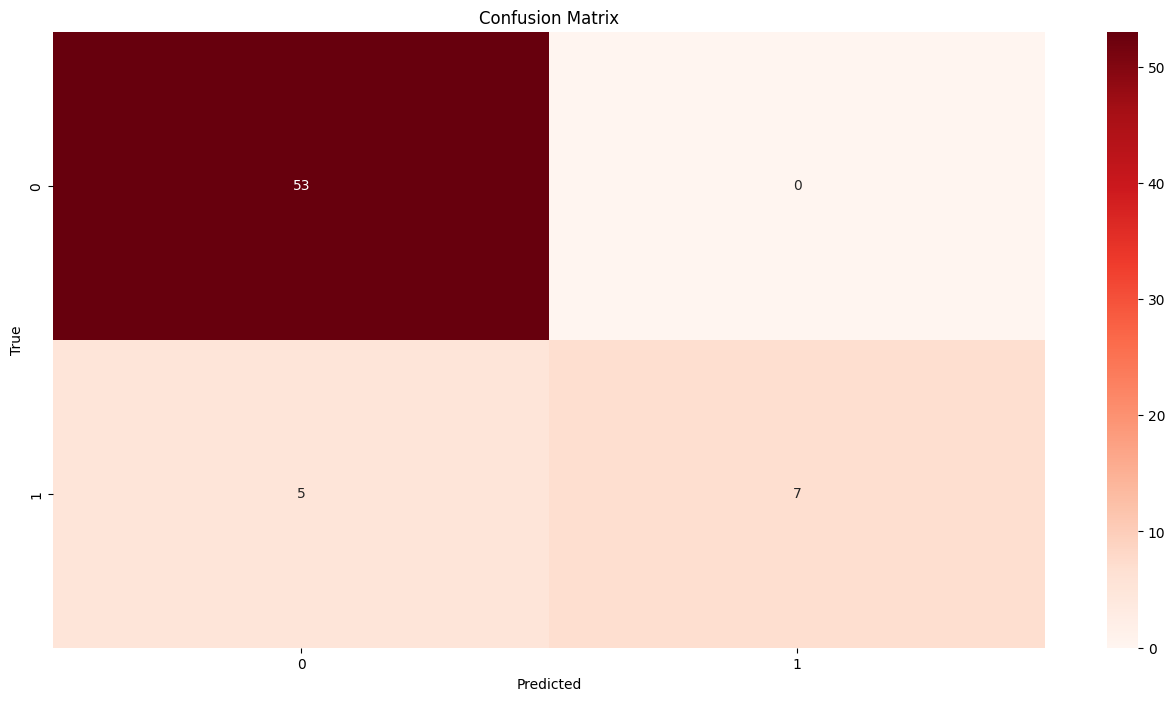

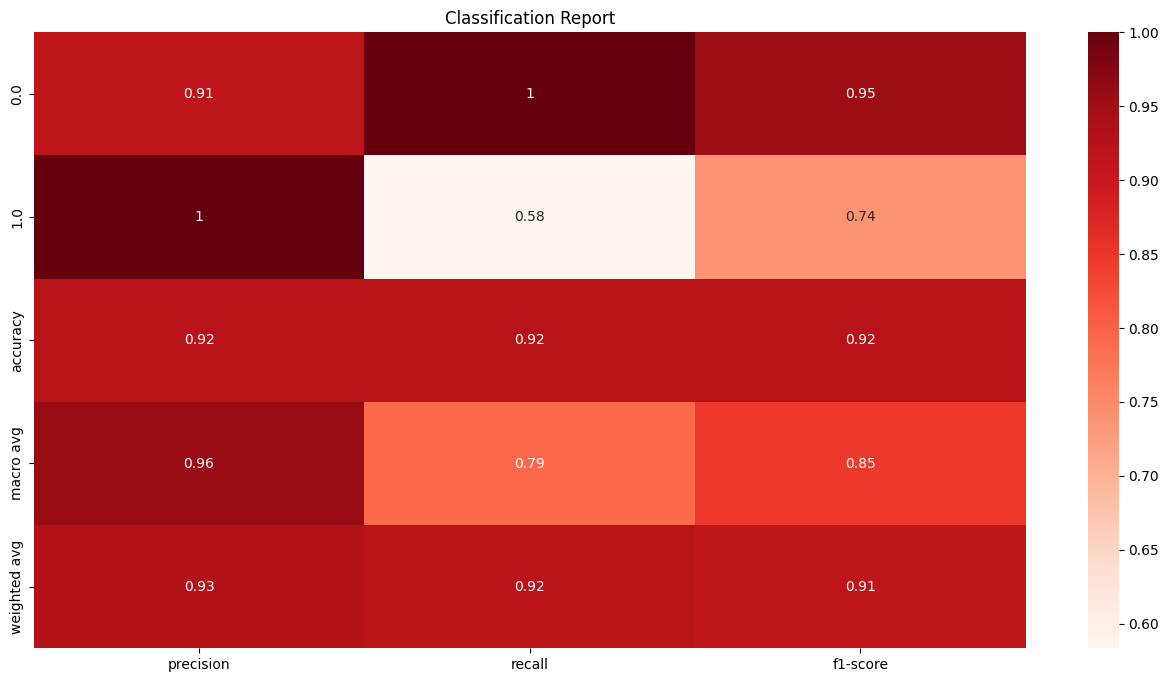

In [34]:
# Plot the probability distribution
plt.figure(figsize=(16, 8))
sns.histplot(y_pred_proba, kde=True, bins=50, palette='viridis')
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.title("Probability Distribution")
plt.show()

# Plot the ROC curve
fig, ax = plt.subplots(figsize=(16, 8))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
ax.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc_rf:.2f})")
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Plot the heatmap of the confusion matrix, cmap = reds
plt.figure(figsize=(16, 8))
sns.heatmap(cm_rf, annot=True, cmap='Reds', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Plot the classification report, cmap = reds
plt.figure(figsize=(16, 8))
sns.heatmap(pd.DataFrame(cr_rf).iloc[:-1, :].T, annot=True, cmap='Reds')
plt.title("Classification Report")
plt.show()

# Extra data processing for Logistic Regression
In this part, we will conduct extra data processing for the logistic regression model. This is because the logistic regression model can not handle target encoding, so we need to encode the country column with one-hot encoding.

In [41]:
X_train = training_set.drop(columns=['Banking Crisis '])
y_train = training_set['Banking Crisis ']

X_test = test_set.drop(columns=['Banking Crisis '])
y_test = test_set['Banking Crisis ']

columns = ['si01', 'si02', 'si03', 'si04', 'si05', 'si06', 'si07', 'sm01', 'oi01', 'oi02']
target_column = 'Banking Crisis '

one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)
one_hot_encoded_train = one_hot_encoder.fit_transform(training_set[['iso3']])
one_hot_encoded_test = one_hot_encoder.transform(test_set[['iso3']])

one_hot_encoded_train_df = pd.DataFrame(one_hot_encoded_train, columns=one_hot_encoder.get_feature_names_out(['iso3']))
one_hot_encoded_test_df = pd.DataFrame(one_hot_encoded_test, columns=one_hot_encoder.get_feature_names_out(['iso3']))

one_hot_encoded_train_df.index = training_set.index
one_hot_encoded_test_df.index = test_set.index

X_train = pd.concat([training_set[columns], one_hot_encoded_train_df], axis=1)
X_test = pd.concat([test_set[columns], one_hot_encoded_test_df], axis=1)
y_train = training_set[target_column]
y_test = test_set[target_column]

In [42]:
SMOTETomek_obj = SMOTETomek(sampling_strategy=0.6, random_state = 42)
X_train_os, y_train_os = oversample_data(SMOTETomek_obj,X_train,y_train)



trained_model_regression_path = "model/logistic_regression_model.pkl"
os_path = "model/os.pkl"

lr_model = LogisticRegression(max_iter=10000, random_state=42)

params = {
    'C': np.linspace(0.1, 1, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

random_search = RandomizedSearchCV(lr_model, param_distributions=params,
                                n_iter=75, scoring='accuracy',
                                n_jobs=-1, cv=5, random_state=42)

random_search.fit(X_train_os, y_train_os)


# OUTPUT
# Print the best score
print("Best accuracy: ", random_search.best_score_)

# Print the best parameters
print("Best parameters: ", random_search.best_params_)

# Get teh best model and store in the trained_model path "model/xgboost_model.pkl"
best_model = random_search.best_estimator_
with open(trained_model_regression_path, 'wb') as file:
    pickle.dump(best_model, file)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 20 is smaller than n_iter=75. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best accuracy:  0.764047442550037
Best parameters:  {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}


In [43]:
# Load the model
with open(trained_model_regression_path, 'rb') as file:
    model = pickle.load(file)

y_pred = model.predict(X_test)

# Calculate the matrix
cm_lr = confusion_matrix(y_test, y_pred)
cr_lr = classification_report(y_test, y_pred, output_dict=True)

# OUTPUT
print("Confusion Matrix")
print(cm_lr)
print("Classification Report")
print(cr_lr)
# Calculate the ROC AUC score and plot the ROC curve
y_pred_proba = model.predict_proba(X_test)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba[:, 1])
print("ROC AUC score: ", roc_auc_lr)

Confusion Matrix
[[49  4]
 [ 5  7]]
Classification Report
{'0.0': {'precision': 0.9074074074074074, 'recall': 0.9245283018867925, 'f1-score': 0.9158878504672898, 'support': 53.0}, '1.0': {'precision': 0.6363636363636364, 'recall': 0.5833333333333334, 'f1-score': 0.6086956521739131, 'support': 12.0}, 'accuracy': 0.8615384615384616, 'macro avg': {'precision': 0.7718855218855218, 'recall': 0.753930817610063, 'f1-score': 0.7622917513206015, 'support': 65.0}, 'weighted avg': {'precision': 0.8573685573685574, 'recall': 0.8615384615384616, 'f1-score': 0.8591754446285126, 'support': 65.0}}
ROC AUC score:  0.8301886792452831


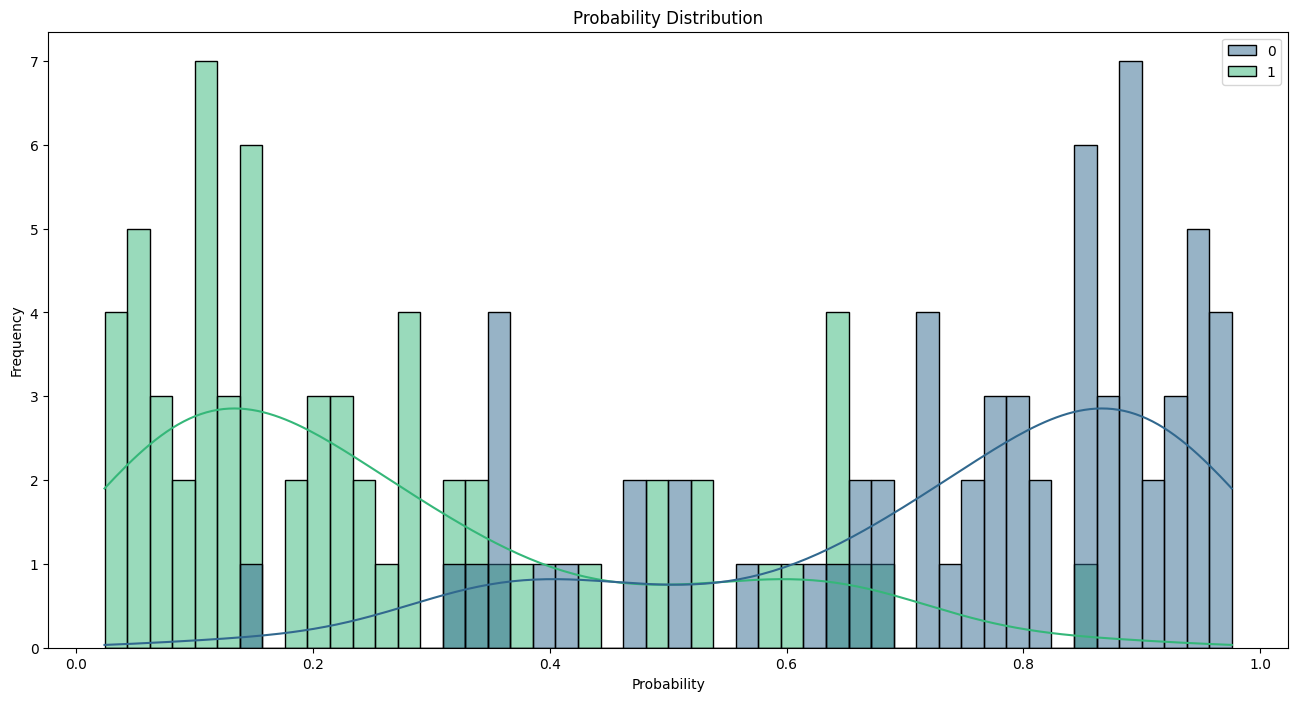

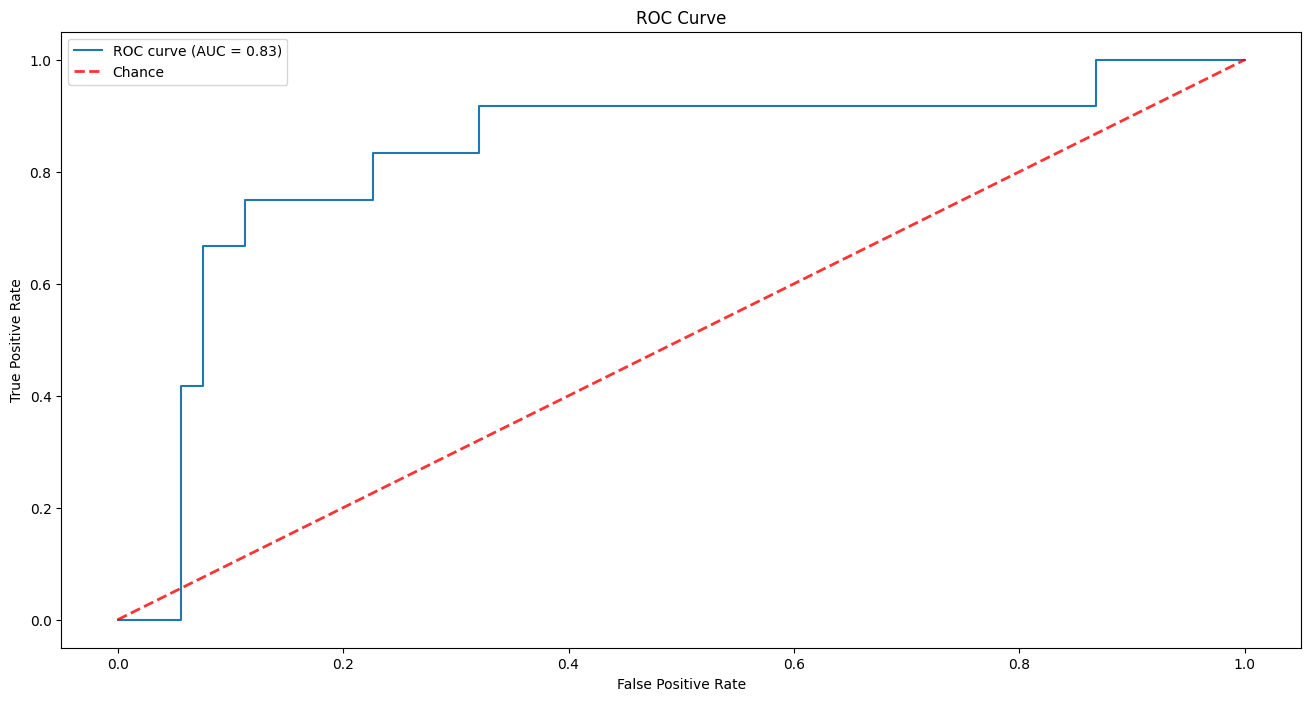

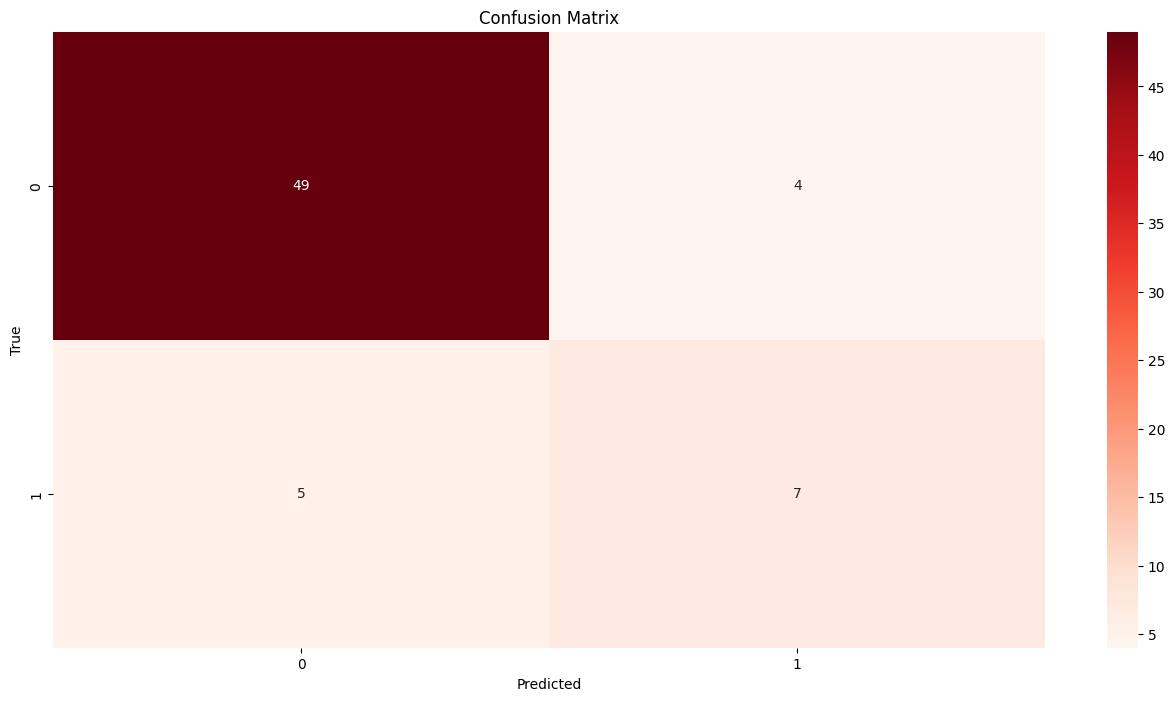

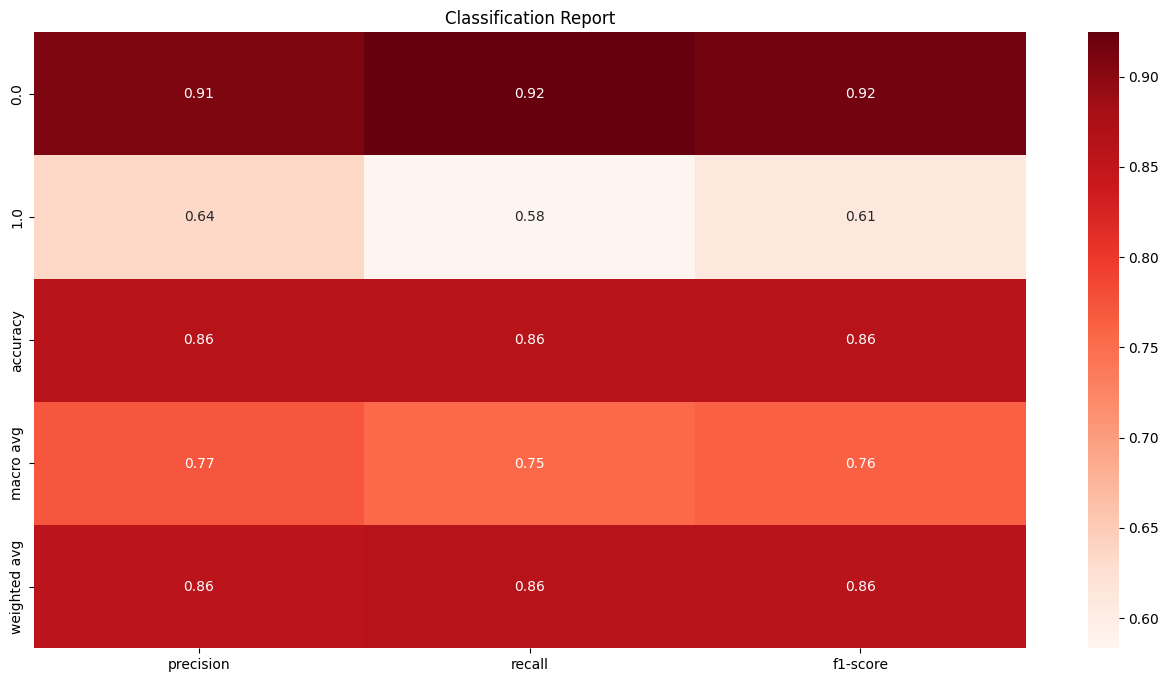

In [44]:
# Plot the probability distribution
plt.figure(figsize=(16, 8))
sns.histplot(y_pred_proba, kde=True, bins=50, palette='viridis')
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.title("Probability Distribution")
plt.show()

# Plot the ROC curve
fig, ax = plt.subplots(figsize=(16, 8))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
ax.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc_lr:.2f})")
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Plot the heatmap of the confusion matrix, cmap = reds
plt.figure(figsize=(16, 8))
sns.heatmap(cm_lr, annot=True, cmap='Reds', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Plot the classification report, cmap = reds
plt.figure(figsize=(16, 8))
sns.heatmap(pd.DataFrame(cr_lr).iloc[:-1, :].T, annot=True, cmap='Reds')
plt.title("Classification Report")
plt.show()

# Comparation between models
In this part, we will compare the performance of the three models: XGBoost, Random Forest, and Logistic Regression on their accuracy, precision, recall, and F1 score.

In [39]:
comparation_df = pd.DataFrame(columns=['model', 'accuracy', 'balanced_accuracy', 'precision', 'recall', 'f1_score', 'roc_auc'])

# XGBoost
# {'0.0': {'precision': 0.8983050847457628, 'recall': 1.0, 'f1-score': 0.9464285714285714, 'support': 53.0}, '1.0': {'precision': 1.0, 'recall': 0.5, 'f1-score': 0.6666666666666666, 'support': 12.0}, 'accuracy': 0.9076923076923077, 'macro avg': {'precision': 0.9491525423728814, 'recall': 0.75, 'f1-score': 0.8065476190476191, 'support': 65.0}, 'weighted avg': {'precision': 0.9170795306388527, 'recall': 0.9076923076923077, 'f1-score': 0.8947802197802197, 'support': 65.0}}
col = {'model': 'XGBoost',
            'accuracy': cr_xgboost['accuracy'],
            'balanced_accuracy': cr_xgboost['macro avg']['recall'],
            'precision': cr_xgboost['1.0']['precision'],
            'recall': cr_xgboost['1.0']['recall'],
            'f1_score': cr_xgboost['1.0']['f1-score'],
            'roc_auc': roc_auc_xgboost
            }
df = pd.DataFrame([col])
comparation_df = pd.concat([comparation_df, df], ignore_index=True)
# Random Forest
col = {'model': 'Random Forest',
       'accuracy': cr_rf['accuracy'],
       'balanced_accuracy': cr_rf['macro avg']['recall'],
       'precision': cr_rf['1.0']['precision'],
       'recall': cr_rf['1.0']['recall'],
       'f1_score': cr_rf['1.0']['f1-score'],
       'roc_auc': roc_auc_rf
      }
df = pd.DataFrame([col])
comparation_df = pd.concat([comparation_df, df], ignore_index=True)

# Logistic Regression
col = {'model': 'Logistic Regression',
       'accuracy': cr_lr['accuracy'],
       'balanced_accuracy': cr_lr['macro avg']['recall'],
       'precision': cr_lr['1.0']['precision'],
       'recall': cr_lr['1.0']['recall'],
       'f1_score': cr_lr['1.0']['f1-score'],
       'roc_auc': roc_auc_lr
      }
df = pd.DataFrame([col])
comparation_df = pd.concat([comparation_df, df], ignore_index=True)
print(comparation_df)

                 model  accuracy  balanced_accuracy  precision    recall  \
0              XGBoost  0.892308           0.740566   0.857143  0.500000   
1        Random Forest  0.923077           0.791667   1.000000  0.583333   
2  Logistic Regression  0.861538           0.753931   0.636364  0.583333   

   f1_score   roc_auc  
0  0.631579  0.984277  
1  0.736842  0.970126  
2  0.608696  0.830189  


# Draw the models' performance
In this part, we will draw the models' performance on the testing set. Comparing their accuracy, precision, recall, and F1 score through radar charts.

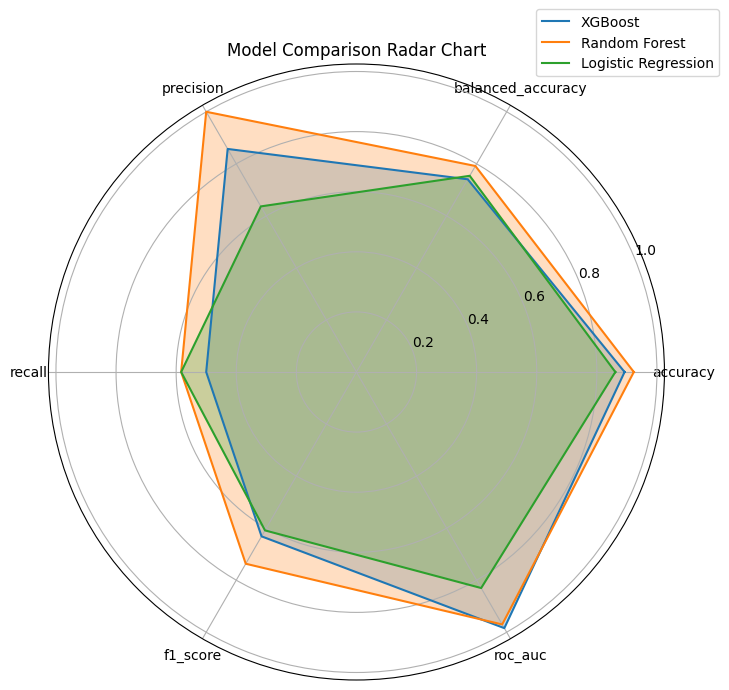

In [40]:

comparation_df.set_index('model', inplace=True)
comparation_df = comparation_df.transpose()

labels = comparation_df.index
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for model in comparation_df.columns:
    values = comparation_df[model].tolist()
    values += values[:1]
    ax.fill(angles, values, alpha=0.25)
    ax.plot(angles, values, label=model)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.title('Model Comparison Radar Chart')

ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()


# Summary
- The random forest is the best model among the three models.

# PPS analysis
In this part, we will conduct a PPS analysis on the features to see the predictive power of each feature.

                                              Feature  Importance
1                                        Bank Z-score       540.0
10                           Bank deposits to GDP (%)       536.0
6   Liquid assets to deposits and short term fundi...       526.0
4                    Bank credit to bank deposits (%)       498.0
7               Provisions to nonperforming loans (%)       458.0
8                              Stock price volatility       440.0
3                    Bank capital to total assets (%)       431.0
9                              Bank concentration (%)       430.0
2         Bank nonperforming loans to gross loans (%)       405.0
5   Bank regulatory capital to risk-weighted asset...       336.0
0                                             Country       324.0


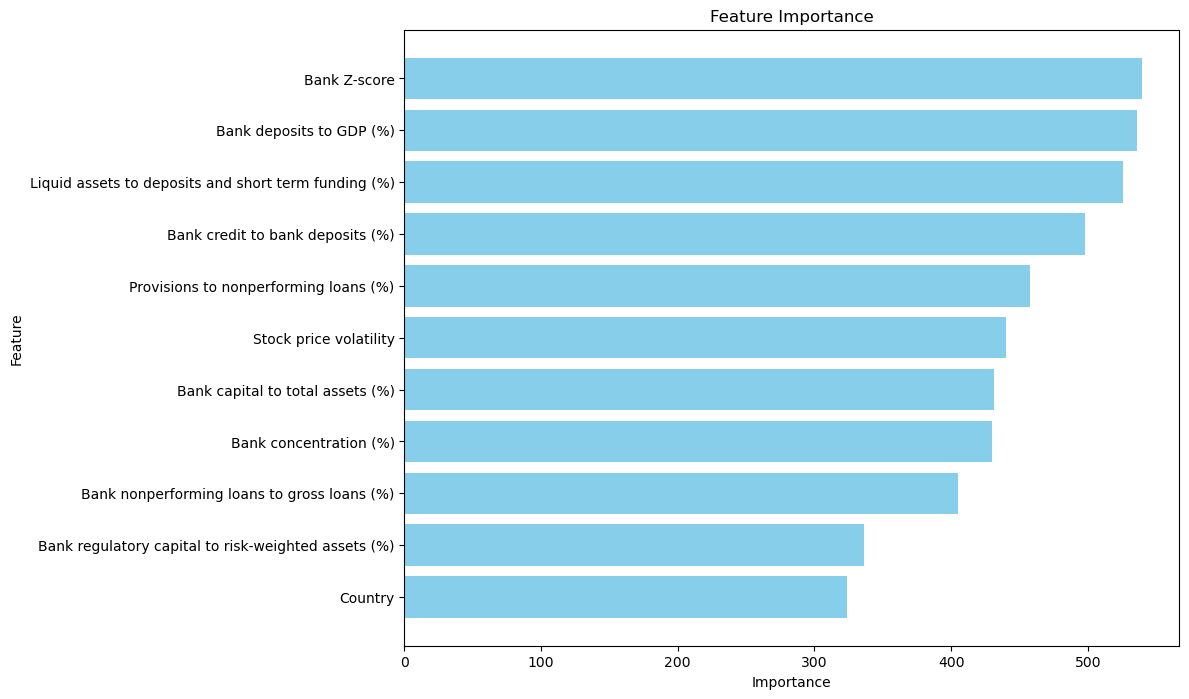

In [ ]:
with open(trained_model_xgboost_path, 'rb') as file:
    model = pickle.load(file)


featuer_decoder = {
    'si01': 'Bank Z-score',
    'si02': 'Bank nonperforming loans to gross loans (%)',
    'si03': 'Bank capital to total assets (%)',
    'si04': 'Bank credit to bank deposits (%)',
    'si05': 'Bank regulatory capital to risk-weighted assets (%)',
    'si06': 'Liquid assets to deposits and short term funding (%)',
    'si07': 'Provisions to nonperforming loans (%)',
    'sm01': 'Stock price volatility',
    'oi01': 'Bank concentration (%)',
    'oi02': 'Bank deposits to GDP (%)',
    'iso3': 'Country'
}

# Ensure the model is an XGBoost Booster object
if isinstance(model, xgb.Booster):
    booster = model
else:
    booster = model.get_booster()

# Get feature importance
feature_importance = booster.get_score(importance_type='weight')
importance_df = pd.DataFrame(feature_importance.items(), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df['Feature'] = importance_df['Feature'].apply(lambda x: featuer_decoder[x])

# Print the importance dataframe
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Future directions
We have successfully built a model to predict banking crises. However, there are still some areas that can be improved:
1. Stacked models: Although the xgboost model is the best model among the three models, we can still try to stack the models to see if we can get better performance.
2. Country specific features: Since some of the data is country-specific. Could conduct further transfer learning on the data.
3. More models: If time permits, we could try other models like SVM, neural networks, etc. to see we can get better performance.



